In [5]:
import networkx as nx
import numpy as np
import scipy.linalg as la
import non_backtracking_tools as nbt
import nb_general as nb
import matplotlib.pyplot as plt

In [6]:
# Define formulas for positive and negative roots
positive = lambda lambda_val, c, d: (lambda_val*c+np.sqrt((lambda_val*c)**2-4*c*d))/(2*c)
negative = lambda lambda_val, c, d: (lambda_val*c-np.sqrt((lambda_val*c)**2-4*c*d))/(2*c)

In [7]:
# Look at small example
G = nx.Graph([[1,2],[2,3],[3,4],[2,4],[4,5],[4,6],[6,2],[6,1]])
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree).values()))
K = np.block([[A,D-np.eye(D.shape[0])],[-np.eye(D.shape[0]),np.zeros_like(D)]])

# Get eigenvectors and eigenvalues
mu_vals, mu_vecs = la.eig(K)
lambda_vals, lambda_vecs = la.eig(A)

# Get Y matrix
Y = mu_vecs[mu_vecs.shape[0]//2:,:]

In [8]:
# Calculate whether eigenvalue is found with positive or negative values
for i in range(len(mu_vals)):
    # Give current mu
    print(f'$\\mu_{i}$: {mu_vals[i]}')
    for k in range(len(lambda_vals)):
        # Check for orthogonality
        if lambda_vecs[:,k].T@Y[:,i] < 1e-8 and lambda_vecs[:,k].T@Y[:,i] > -1e-8:
            print(f"\t$\\lambda_{k}$: Orthogonal")
            continue
        c = lambda_vecs[:,k].T@Y[:,i]
        d = lambda_vecs[:,k].T@(D-np.eye(D.shape[0]))@Y[:,i]
        positive_vals = positive(lambda_vals[k],c,d)
        negative_vals = negative(lambda_vals[k],c,d)
        # Check for positive version
        print(f'\t$\\lambda_{k}$ (positive): {positive_vals}')
        # Check for negative version
        print(f'\t$\\lambda_{k}$ (negative): {negative_vals}')

$\mu_0$: 0j
	$\lambda_0$ (positive): (3.0143256523762765+0j)
	$\lambda_0$ (negative): 0j
	$\lambda_1$ (positive): (-0-0j)
	$\lambda_1$ (negative): (0.8481360122248263-0j)
	$\lambda_2$ (positive): (-1.8563433811286112-0j)
	$\lambda_2$ (negative): (-0-0j)
	$\lambda_3$ (positive): 0j
	$\lambda_3$ (negative): (-1.4779844012316754+0j)
	$\lambda_4$ (positive): (-0.7248243764723272-0j)
	$\lambda_4$ (negative): (-0-0j)
	$\lambda_5$ (positive): (0.1966904942315095+0j)
	$\lambda_5$ (negative): 0j
$\mu_1$: (1.8637065278191878+0j)
	$\lambda_0$ (positive): (1.1506191245570923-0j)
	$\lambda_0$ (negative): (1.8637065278191838-0j)
	$\lambda_1$ (positive): (1.8637065278191636+0j)
	$\lambda_1$ (negative): (-1.0155705155943373+0j)
	$\lambda_2$ (positive): (1.8637065278191847+0j)
	$\lambda_2$ (negative): (-3.720049908947796+0j)
	$\lambda_3$ (positive): (1.8637065278192044+0j)
	$\lambda_3$ (negative): (-3.3416909290508796+0j)
	$\lambda_4$ (positive): (1.8637065278191909+0j)
	$\lambda_4$ (negative): (-2.588

In [9]:
lambda_vals[1]+.5

(1.3481360122248263+0j)

In [12]:
# Compare first mu and and first and second lambda
c1 = lambda_vecs[:,0].T@Y[:,0]
c2 = lambda_vecs[:,1].T@Y[:,0]
c3 = lambda_vecs[:,2].T@Y[:,0]
c4 = lambda_vecs[:,3].T@Y[:,0]
c5 = lambda_vecs[:,4].T@Y[:,0]
c6 = lambda_vecs[:,5].T@Y[:,0]
d1 = lambda_vecs[:,0].T@D@Y[:,0]
d2 = lambda_vecs[:,1].T@D@Y[:,0]
d3 = lambda_vecs[:,2].T@D@Y[:,0]
d4 = lambda_vecs[:,3].T@D@Y[:,0]
d5 = lambda_vecs[:,4].T@D@Y[:,0]
d6 = lambda_vecs[:,5].T@D@Y[:,0]
print(f'$\mu_0$: {mu_vals[0]}')
print(f'\t$\lambda_0$: {lambda_vals[0]}\tnegative\t{discrim(0,c1,d1)}')
print(f'\t$\lambda_1$: {lambda_vals[1]}\tpositive\t{discrim(1,c2,d2)}')
print(f'\t$\lambda_2$: {lambda_vals[2]}\tnegative\t{discrim(2,c3,d3)}')
print(f'\t$\lambda_3$: {lambda_vals[3]}\tpositive\t{discrim(3,c4,d4)}')
print(f'\t$\lambda_4$: {lambda_vals[4]}\tnegative\t{discrim(4,c5,d5)}')
print(f'\t$\lambda_5$: {lambda_vals[5]}\tnegative\t{discrim(5,c6,d6)}')
# print(f'\t$\lambda_0$: {lambda_vals[0]}\tnegative\t{lambda_vals[0]-mu_vals[0]}')
# print(f'\t$\lambda_1$: {lambda_vals[1]}\tpositive\t{lambda_vals[1]-mu_vals[0]}')
# print(f'\t$\lambda_2$: {lambda_vals[2]}\tnegative\t{lambda_vals[2]-mu_vals[0]}')
# print(f'\t$\lambda_3$: {lambda_vals[3]}\tpositive\t{lambda_vals[3]-mu_vals[0]}')
# print(f'\t$\lambda_4$: {lambda_vals[4]}\tnegative\t{lambda_vals[4]-mu_vals[0]}')
# print(f'\t$\lambda_5$: {lambda_vals[5]}\tnegative\t{lambda_vals[5]-mu_vals[0]}')
c1 = lambda_vecs[:,0].T@Y[:,1]
c2 = lambda_vecs[:,1].T@Y[:,1]
c3 = lambda_vecs[:,2].T@Y[:,1]
c4 = lambda_vecs[:,3].T@Y[:,1]
c5 = lambda_vecs[:,4].T@Y[:,1]
c6 = lambda_vecs[:,5].T@Y[:,1]
d1 = lambda_vecs[:,0].T@D@Y[:,1]
d2 = lambda_vecs[:,1].T@D@Y[:,1]
d3 = lambda_vecs[:,2].T@D@Y[:,1]
d4 = lambda_vecs[:,3].T@D@Y[:,1]
d5 = lambda_vecs[:,4].T@D@Y[:,1]
d6 = lambda_vecs[:,5].T@D@Y[:,1]
print(f'$\mu_1$: {mu_vals[1]}')
print(f'\t$\lambda_0$: {lambda_vals[0]}\tnegative\t{discrim(0,c1,d1)}')
print(f'\t$\lambda_1$: {lambda_vals[1]}\tpositive\t{discrim(1,c2,d2)}')
print(f'\t$\lambda_2$: {lambda_vals[2]}\tnegative\t{discrim(2,c3,d3)}')
print(f'\t$\lambda_3$: {lambda_vals[3]}\tpositive\t{discrim(3,c4,d4)}')
print(f'\t$\lambda_4$: {lambda_vals[4]}\tnegative\t{discrim(4,c5,d5)}')
print(f'\t$\lambda_5$: {lambda_vals[5]}\tnegative\t{discrim(5,c6,d6)}')
# print(f'\t$\lambda_0$: {lambda_vals[0]}\tnegative\t{lambda_vals[0]-mu_vals[1]}')
# print(f'\t$\lambda_1$: {lambda_vals[1]}\tpositive\t{lambda_vals[1]-mu_vals[1]}')
# print(f'\t$\lambda_2$: {lambda_vals[2]}\tpositive\t{lambda_vals[2]-mu_vals[1]}')
# print(f'\t$\lambda_3$: {lambda_vals[3]}\tpositive\t{lambda_vals[3]-mu_vals[1]}')
# print(f'\t$\lambda_4$: {lambda_vals[4]}\tpositive\t{lambda_vals[4]-mu_vals[1]}')
# print(f'\t$\lambda_5$: {lambda_vals[5]}\tnegative\t{lambda_vals[5]-mu_vals[1]}')

$\mu_0$: 0j
	$\lambda_0$: (3.0143256523762765+0j)	negative	(0.13916383217866818+0j)
	$\lambda_1$: (0.8481360122248263+0j)	positive	(-0.8465750649996536+0j)
	$\lambda_2$: (-1.8563433811286112+0j)	negative	(-0.07226533306612931+0j)
	$\lambda_3$: (-1.4779844012316754+0j)	positive	(-0.0024667159200347883-0j)
	$\lambda_4$: (-0.7248243764723271+0j)	negative	(-0.6478050469920936+0j)
	$\lambda_5$: (0.1966904942315095+0j)	negative	(-1.5700516712007553+0j)
$\mu_1$: (1.8637065278191878+0j)
	$\lambda_0$: (3.0143256523762765+0j)	negative	(-0.7674200363313899+0j)
	$\lambda_1$: (0.8481360122248263+0j)	positive	(7.44438564621416e-05+0j)
	$\lambda_2$: (-1.8563433811286112+0j)	negative	(0.012811637930674224-0j)
	$\lambda_3$: (-1.4779844012316754+0j)	positive	(0.03229732702118995-0j)
	$\lambda_4$: (-0.7248243764723271+0j)	negative	(0.024493814614427456-0j)
	$\lambda_5$: (0.1966904942315095+0j)	negative	(0.0026420662825394434-0j)


In [11]:
discrim = lambda i, c, d: (lambda_vals[i]*c)**2-4*c*d

In [18]:
# Calculate whether eigenvalue is found with positive or negative values
# Look at small example
G = nx.random_partition_graph([np.random.randint(20,100),np.random.randint(20,100)],0.25,.05)
F = list(nx.connected_component_subgraphs(G))
G = F[0]
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree).values()))
K = np.block([[A,D-np.eye(D.shape[0])],[-np.eye(D.shape[0]),np.zeros_like(D)]])

# Get eigenvectors and eigenvalues
mu_vals, mu_vecs = la.eig(K)
lambda_vals, lambda_vecs = la.eig(A)

# Get Y matrix
Y = mu_vecs[mu_vecs.shape[0]//2:,:]

for i in range(len(mu_vals)):
    # Give current mu
    print(f'$\\mu_{i}$: {mu_vals[i]}')
    for k in range(len(lambda_vals)):
        # Check for orthogonality
        if lambda_vecs[:,k].T@Y[:,i] < 1e-8 and lambda_vecs[:,k].T@Y[:,i] > -1e-8:
            print(f"\t$\\lambda_{k}$: Orthogonal")
            continue
        c = lambda_vecs[:,k].T@Y[:,i]
        d = lambda_vecs[:,k].T@(D-np.eye(D.shape[0]))@Y[:,i]
        positive_vals = positive(lambda_vals[k],c,d)
        negative_vals = negative(lambda_vals[k],c,d)
        # Check for positive version
        print(f'\t$\\lambda_{k}$ (positive): {positive_vals}\t{d}')
        # Check for negative version
        print(f'\t$\\lambda_{k}$ (negative): {negative_vals}\t{d}')

$\mu_0$: (18.429720136506635+0j)
	$\lambda_0$ (positive): (18.429720136506653+0j)	(1.0516014031611234+0j)
	$\lambda_0$ (negative): (1.0532534859381752+0j)	(1.0516014031611234+0j)
	$\lambda_1$ (positive): (18.42972013650668+0j)	(-0.04850266678612314+0j)
	$\lambda_1$ (negative): (-5.674562592208756+0j)	(-0.04850266678612314+0j)
	$\lambda_2$ (positive): (-11.199527921201032-0j)	(0.010249254953095723+0j)
	$\lambda_2$ (negative): (18.42972013650733-0j)	(0.010249254953095723+0j)
	$\lambda_3$ (positive): (-25.903792331478968-0j)	(0.01298411905124669+0j)
	$\lambda_3$ (negative): (18.429720136508347-0j)	(0.01298411905124669+0j)
	$\lambda_4$ (positive): (-11.500882708563326-0j)	(0.02858835466145509+0j)
	$\lambda_4$ (negative): (18.429720136507896-0j)	(0.02858835466145509+0j)
	$\lambda_5$ (positive): (18.42972013650775+0j)	(-0.014529720715749511+0j)
	$\lambda_5$ (negative): (-25.643987313605606+0j)	(-0.014529720715749511+0j)
	$\lambda_6$ (positive): (18.429720136506575+0j)	(-0.02410390874705315+0

	$\lambda_69$ (negative): (3.5114265357742647-2.2822142466667428j)	(0.033236866679377586+0.021507921524439172j)
	$\lambda_70$ (positive): (3.511426535774253-2.2822142466667623j)	(-0.13772022066236994-0.02312402206535312j)
	$\lambda_70$ (negative): (-6.4051589465443+2.2822142466667623j)	(-0.13772022066236994-0.02312402206535312j)
	$\lambda_71$ (positive): (3.511426535774174-2.282214246666791j)	(-0.029409568312165818+0.012851789021162262j)
	$\lambda_71$ (negative): (-6.3534165190888405+2.282214246666791j)	(-0.029409568312165818+0.012851789021162262j)
	$\lambda_72$ (positive): (3.5114265357741825-2.282214246666723j)	(-0.031250222223857455+0.0033324959703648314j)
	$\lambda_72$ (negative): (-6.232040163546264+2.2822142466667232j)	(-0.031250222223857455+0.0033324959703648314j)
	$\lambda_73$ (positive): (-6.107235016234813+2.282214246666845j)	(0.045116352708263335+0.00031066842472349254j)
	$\lambda_73$ (negative): (3.5114265357742993-2.2822142466668454j)	(0.045116352708263335+0.00031066842472

	$\lambda_15$ (positive): (2.4547546640675884+2.497782367337877j)	(-0.019130560006548558-0.030078580143998515j)
	$\lambda_15$ (negative): (3.3454098438892834-2.497782367337877j)	(-0.019130560006548558-0.030078580143998515j)
	$\lambda_16$ (positive): (-9.45701331227326+2.4977823673380404j)	(0.05572908166162298+0.027665336095357346j)
	$\lambda_16$ (negative): (3.345409843889281-2.49778236733804j)	(0.05572908166162298+0.027665336095357346j)
	$\lambda_17$ (positive): (2.3289467608238614+2.4977823673378987j)	(0.04906503418720995-0.4086411481856161j)
	$\lambda_17$ (negative): (3.345409843889246-2.4977823673378987j)	(0.04906503418720995-0.4086411481856161j)
	$\lambda_18$ (positive): (2.202624965846758+2.4977823673379076j)	(-0.07760793426590823-0.18672960321912668j)
	$\lambda_18$ (negative): (3.34540984388922-2.4977823673379063j)	(-0.07760793426590823-0.18672960321912668j)
	$\lambda_19$ (positive): (3.345409843889211-2.4977823673379342j)	(0.032972270444456886+0.08876185310723153j)
	$\lambda_19

	$\lambda_104$ (positive): (-4.693624231521202+2.4836824018793764j)	(0.031400271939445945-0.022971908324966636j)
	$\lambda_104$ (negative): (3.24419542862571-2.4836824018793764j)	(0.031400271939445945-0.022971908324966636j)
	$\lambda_105$ (positive): (-4.6244306819055945+2.483682401879419j)	(0.04757774725963487-0.0013080265636022936j)
	$\lambda_105$ (negative): (3.24419542862575-2.483682401879419j)	(0.04757774725963487-0.0013080265636022936j)
	$\lambda_106$ (positive): (-3.5694682135120144+2.483682401879476j)	(0.08479923570599045+0.021333389164612054j)
	$\lambda_106$ (negative): (3.244195428625771-2.4836824018794754j)	(0.08479923570599045+0.021333389164612054j)
	$\lambda_107$ (positive): (-3.4724922145477968+2.4836824018794683j)	(0.019174322897051732+0.011611186680769603j)
	$\lambda_107$ (negative): (3.244195428625829-2.4836824018794683j)	(0.019174322897051732+0.011611186680769603j)
	$\lambda_108$ (positive): (3.2441954286255985-2.483682401879595j)	(-0.018144011207566257-0.008980849111

	$\lambda_35$ (positive): (7.746031192981152-2.4385521709138307j)	(-0.025801654697033057+0.028854369014589876j)
	$\lambda_35$ (negative): (-3.4152540327024843+2.4385521709138307j)	(-0.025801654697033057+0.028854369014589876j)
	$\lambda_36$ (positive): (-1.3116811339052463-2.438552170913958j)	(-0.005907878090015362+0.022669253431304492j)
	$\lambda_36$ (negative): (-3.415254032702441+2.438552170913958j)	(-0.005907878090015362+0.022669253431304492j)
	$\lambda_37$ (positive): (-1.1764606551990855-2.438552170913844j)	(-0.007534788021801658+0.02881288716280067j)
	$\lambda_37$ (negative): (-3.4152540327025465+2.4385521709138445j)	(-0.007534788021801658+0.02881288716280067j)
	$\lambda_38$ (positive): (7.533494387982718-2.438552170913851j)	(-0.07633901827384285-0.07860768677632252j)
	$\lambda_38$ (negative): (-3.4152540327024044+2.4385521709138516j)	(-0.07633901827384285-0.07860768677632252j)
	$\lambda_39$ (positive): (-3.415254032702411+2.4385521709139915j)	(0.09994963189967573+0.0419992217207

	$\lambda_122$ (positive): (-3.3604604872839925+2.603243294717575j)	(0.004570564098292984-0.01605631051071102j)
	$\lambda_122$ (negative): (3.3086939668173327-2.6032432947175757j)	(0.004570564098292984-0.01605631051071102j)
	$\lambda_123$ (positive): (1.5457178826657176-2.603243294717657j)	(-0.0034680364988319556+0.008607923744258915j)
	$\lambda_123$ (negative): (-3.360460487284034+2.603243294717657j)	(-0.0034680364988319556+0.008607923744258915j)
$\mu_15$: (-3.360460487283955-2.6032432947175796j)
	$\lambda_0$ (positive): (22.843434109728488+2.60324329471732j)	(-0.059277146105138526+0.008595697149818345j)
	$\lambda_0$ (negative): (-3.360460487283665-2.6032432947173194j)	(-0.059277146105138526+0.008595697149818345j)
	$\lambda_1$ (positive): (16.115618031581782+2.603243294717692j)	(-0.03769018311339739-0.01206458800851068j)
	$\lambda_1$ (negative): (-3.360460487283855-2.603243294717693j)	(-0.03769018311339739-0.01206458800851068j)
	$\lambda_2$ (positive): (10.590652702590361+2.6032432947

	$\lambda_64$ (positive): (-3.2031984571397345-2.799890776947135j)	(0.02554353032168087+0.014279662716766658j)
	$\lambda_64$ (negative): (6.044894836241559+2.799890776947135j)	(0.02554353032168087+0.014279662716766658j)
	$\lambda_65$ (positive): (0.13050908471910136+2.79989077694699j)	(-0.05432285088610536-0.007015353168491001j)
	$\lambda_65$ (negative): (-3.2031984571395133-2.79989077694699j)	(-0.05432285088610536-0.007015353168491001j)
	$\lambda_66$ (positive): (5.908904208003665+2.799890776946989j)	(-0.04722747128065205+0.00047019479591109414j)
	$\lambda_66$ (negative): (-3.2031984571394827-2.799890776946989j)	(-0.04722747128065205+0.00047019479591109414j)
	$\lambda_67$ (positive): (5.728835475343711+2.7998907769469774j)	(-0.02278647543945332-0.022665015795929416j)
	$\lambda_67$ (negative): (-3.203198457139625-2.7998907769469774j)	(-0.02278647543945332-0.022665015795929416j)
	$\lambda_68$ (positive): (-3.2031984571395906-2.799890776947023j)	(0.02733513671694225+0.0049052293742054415

	$\lambda_123$ (positive): (1.3654308718089765+2.6901954081425816j)	(-0.033336987508089604-0.00821245830801886j)
	$\lambda_123$ (negative): (-3.1801734764272926-2.690195408142582j)	(-0.033336987508089604-0.00821245830801886j)
$\mu_20$: (-3.080286576612767+2.975778692618235j)
	$\lambda_0$ (positive): (-3.080286576612718+2.975778692618233j)	(0.13929256442903332+0.04970796043727122j)
	$\lambda_0$ (negative): (22.563260199057545-2.975778692618234j)	(0.13929256442903332+0.04970796043727122j)
	$\lambda_1$ (positive): (15.835444120910644-2.9757786926182592j)	(-0.07826662093399259-0.04629901156569244j)
	$\lambda_1$ (negative): (-3.0802865766127168+2.9757786926182592j)	(-0.07826662093399259-0.04629901156569244j)
	$\lambda_2$ (positive): (-3.0802865766120817+2.9757786926188237j)	(0.03139283543399586-0.020110151497305995j)
	$\lambda_2$ (negative): (10.310478791918378-2.975778692618823j)	(0.03139283543399586-0.020110151497305995j)
	$\lambda_3$ (positive): (-3.0802865766128007+2.9757786926182126j)	

	$\lambda_31$ (negative): (-8.124442987658394+2.951539463219386j)	(-0.0017268833589027532+0.039454887333727096j)
	$\lambda_32$ (positive): (3.0701823266078256-2.9515394632191847j)	(-0.05708895435793055-0.004602259029220027j)
	$\lambda_32$ (negative): (-8.000472417826813+2.9515394632191843j)	(-0.05708895435793055-0.004602259029220027j)
	$\lambda_33$ (positive): (3.0701823266078527-2.9515394632193965j)	(-0.05739066346024635-0.010249341435567202j)
	$\lambda_33$ (negative): (-7.903623684406675+2.9515394632193965j)	(-0.05739066346024635-0.010249341435567202j)
	$\lambda_34$ (positive): (1.3300085159629629+2.9515394632193526j)	(0.17304413379726935-0.19544135043140998j)
	$\lambda_34$ (negative): (3.0701823266078203-2.951539463219353j)	(0.17304413379726935-0.19544135043140998j)
	$\lambda_35$ (positive): (3.0701823266078043-2.951539463219358j)	(0.0002862866500602662+0.1384516486017339j)
	$\lambda_35$ (negative): (1.260594833670863+2.951539463219357j)	(0.0002862866500602662+0.1384516486017339j)
	

	$\lambda_122$ (negative): (2.87938672285854-2.8341147140542122j)	(0.05352600391364301+0.03170240452238475j)
	$\lambda_123$ (positive): (2.8793867228585066-2.834114714054218j)	(-0.024571426208993635+0.05090804942558683j)
	$\lambda_123$ (negative): (-4.694129327476823+2.834114714054218j)	(-0.024571426208993635+0.05090804942558683j)
$\mu_26$: (2.892900208323886+2.8986545830175365j)
	$\lambda_0$ (positive): (16.59007341412135-2.898654583017429j)	(0.04348984100569965+0.04973644039579313j)
	$\lambda_0$ (negative): (2.892900208323472+2.89865458301743j)	(0.04348984100569965+0.04973644039579313j)
	$\lambda_1$ (positive): (9.862257335974082-2.8986545830176795j)	(-0.0038253431593322507+0.07967031343736819j)
	$\lambda_1$ (negative): (2.8929002083238466+2.898654583017679j)	(-0.0038253431593322507+0.07967031343736819j)
	$\lambda_2$ (positive): (4.337292006982487-2.8986545830174832j)	(0.311784903752532+0.051813649943211026j)
	$\lambda_2$ (negative): (2.8929002083238102+2.8986545830174832j)	(0.311784

	$\lambda_29$ (positive): (1.906561773476323+3.133033640940606j)	(0.02649820845010733-0.22660093676049262j)
	$\lambda_29$ (negative): (2.8147155178438195-3.1330336409406057j)	(0.02649820845010733-0.22660093676049262j)
	$\lambda_30$ (positive): (2.814715517843788-3.133033640940598j)	(-0.18032334393869404+0.2764847528598592j)
	$\lambda_30$ (negative): (1.7466927539805646+3.133033640940598j)	(-0.18032334393869404+0.2764847528598592j)
	$\lambda_31$ (positive): (-7.8689761788942985+3.133033640940556j)	(0.055677694190135144+0.05353101071756122j)
	$\lambda_31$ (negative): (2.814715517843865-3.1330336409405555j)	(0.055677694190135144+0.05353101071756122j)
	$\lambda_32$ (positive): (2.814715517843484-3.133033640940698j)	(-0.010267501593971134+0.004513671443563572j)
	$\lambda_32$ (negative): (-7.745005609062472+3.1330336409406985j)	(-0.010267501593971134+0.004513671443563572j)
	$\lambda_33$ (positive): (2.8147155178438807-3.133033640940665j)	(-0.09134897436686876-0.07237370363582683j)
	$\lambda_

	$\lambda_39$ (negative): (2.7942432813148295-3.269582996472306j)	(0.12693545154182434-0.08497414412885992j)
	$\lambda_40$ (positive): (-7.262877243829635+3.2695829964722303j)	(0.05336599704982087+0.03313975288937782j)
	$\lambda_40$ (negative): (2.7942432813148286-3.2695829964722307j)	(0.05336599704982087+0.03313975288937782j)
	$\lambda_41$ (positive): (-7.127611694761461+3.269582996472315j)	(0.05222260017152788+0.05885591680060566j)
	$\lambda_41$ (negative): (2.7942432813149543-3.2695829964723155j)	(0.05222260017152788+0.05885591680060566j)
	$\lambda_42$ (positive): (1.1256204329225943+3.26958299647232j)	(-0.030553943518449117-0.033719013032151406j)
	$\lambda_42$ (negative): (2.7942432813148574-3.269582996472319j)	(-0.030553943518449117-0.033719013032151406j)
	$\lambda_43$ (positive): (-7.0389465308079044+3.2695829964722574j)	(-0.013877636182993956-0.03815100949368547j)
	$\lambda_43$ (negative): (2.794243281314812-3.269582996472258j)	(-0.013877636182993956-0.03815100949368547j)
	$\lam

	$\lambda_112$ (negative): (2.726349614929908-3.308567183576008j)	(0.009242944705171369-0.0289849960132951j)
	$\lambda_113$ (positive): (2.7263496149300277-3.308567183575911j)	(0.022260196184925862+0.07368233628161802j)
	$\lambda_113$ (negative): (-3.4364893621796764+3.3085671835759105j)	(0.022260196184925862+0.07368233628161802j)
	$\lambda_114$ (positive): (2.726349614930081-3.308567183575854j)	(-0.04147401746913527+0.0331213076309283j)
	$\lambda_114$ (negative): (-2.830043753610485+3.3085671835758546j)	(-0.04147401746913527+0.0331213076309283j)
	$\lambda_115$ (positive): (2.726349614930041-3.3085671835759127j)	(0.03297958042556455+0.03142523684266785j)
	$\lambda_115$ (negative): (-3.523510096811836+3.308567183575912j)	(0.03297958042556455+0.03142523684266785j)
	$\lambda_116$ (positive): (2.7263496149300317-3.30856718357595j)	(0.055122624846123874+0.08843682522890575j)
	$\lambda_116$ (negative): (-3.6716491594886627+3.30856718357595j)	(0.055122624846123874+0.08843682522890575j)
	$\lam

	$\lambda_33$ (positive): (-2.9377002467405133+2.7589791760677116j)	(-0.009740975653207029-0.15310321861565163j)
	$\lambda_33$ (negative): (-1.8957411110583098-2.7589791760677116j)	(-0.009740975653207029-0.15310321861565163j)
	$\lambda_34$ (positive): (7.33789108931146-2.758979176067652j)	(-0.05693351813836582-0.004693167108364468j)
	$\lambda_34$ (negative): (-2.937700246740677+2.7589791760676516j)	(-0.05693351813836582-0.004693167108364468j)
	$\lambda_35$ (positive): (7.268477407019166-2.7589791760676268j)	(-0.04804296878291615-0.04994574102774374j)
	$\lambda_35$ (negative): (-2.9377002467404987+2.7589791760676268j)	(-0.04804296878291615-0.04994574102774374j)
	$\lambda_36$ (positive): (-2.937700246740511+2.758979176067678j)	(-0.12405459174178018-0.04590011955601663j)
	$\lambda_36$ (negative): (-1.7892349198671769-2.758979176067678j)	(-0.12405459174178018-0.04590011955601663j)
	$\lambda_37$ (positive): (-1.654014441161107-2.7589791760676556j)	(0.004140514761004327+0.10227995213282633j)

	$\lambda_108$ (positive): (1.6876010617966026-3.005829197911754j)	(-0.015135578090609586+0.02933466077157669j)
	$\lambda_108$ (negative): (-2.908336530394505+3.0058291979117544j)	(-0.015135578090609586+0.02933466077157669j)
	$\lambda_109$ (positive): (3.0259652791610705-3.005829197911794j)	(-0.01931075439050267+0.005199874279565676j)
	$\lambda_109$ (negative): (-2.9083365303944446+3.005829197911794j)	(-0.01931075439050267+0.005199874279565676j)
	$\lambda_110$ (positive): (-2.9083365303944944+3.005829197911777j)	(0.04539589822430293-0.062038157540748484j)
	$\lambda_110$ (negative): (2.4946345333954314-3.005829197911777j)	(0.04539589822430293-0.062038157540748484j)
	$\lambda_111$ (positive): (3.600706383891428-3.005829197911783j)	(-0.04308377877440424+0.034698931472221216j)
	$\lambda_111$ (negative): (-2.908336530394463+3.0058291979117824j)	(-0.04308377877440424+0.034698931472221216j)
	$\lambda_112$ (positive): (1.7869919008535997-3.005829197911795j)	(-0.0038592763217442094+0.0143595999

	$\lambda_48$ (positive): (0.9792956869305334+3.1614828199940366j)	(0.05809059066268821-0.11247596858687064j)
	$\lambda_48$ (negative): (2.6035319587806245-3.161482819994037j)	(0.05809059066268821-0.11247596858687064j)
	$\lambda_49$ (positive): (-6.569143246847269+3.161482819993932j)	(-0.02197383619348614-0.04202452782112112j)
	$\lambda_49$ (negative): (2.6035319587806267-3.1614828199939313j)	(-0.02197383619348614-0.04202452782112112j)
	$\lambda_50$ (positive): (2.6035319587806276-3.1614828199940916j)	(-0.06416741399180811-0.02011873560914134j)
	$\lambda_50$ (negative): (-6.464274367423732+3.161482819994092j)	(-0.06416741399180811-0.02011873560914134j)
	$\lambda_51$ (positive): (2.603531958780511-3.1614828199938563j)	(-0.028702852329316048+0.015580068403142203j)
	$\lambda_51$ (negative): (-6.563984530044234+3.1614828199938563j)	(-0.028702852329316048+0.015580068403142203j)
	$\lambda_52$ (positive): (0.886958234767543+3.161482819994033j)	(0.1260892943216349-0.051356013156198504j)
	$\lam

	$\lambda_94$ (positive): (-4.244476555389899+3.312897262400907j)	(0.011133550838083095-0.006488990280083429j)
	$\lambda_94$ (negative): (2.5302128787499245-3.3128972624009076j)	(0.011133550838083095-0.006488990280083429j)
	$\lambda_95$ (positive): (-1.6055227135987689+3.312897262401001j)	(0.04631887176565863-0.007278356775506232j)
	$\lambda_95$ (negative): (2.5302128787499383-3.312897262401001j)	(0.04631887176565863-0.007278356775506232j)
	$\lambda_96$ (positive): (-1.6815978715093167+3.3128972624010964j)	(-0.0035235236300495687-0.019274473365721124j)
	$\lambda_96$ (negative): (2.530212878749859-3.3128972624010964j)	(-0.0035235236300495687-0.019274473365721124j)
	$\lambda_97$ (positive): (-1.9410297570639727+3.3128972624009845j)	(0.03526163508543184-0.028411569963016095j)
	$\lambda_97$ (negative): (2.5302128787500155-3.3128972624009836j)	(0.03526163508543184-0.028411569963016095j)
	$\lambda_98$ (positive): (2.530212878749954-3.3128972624009614j)	(-0.07999226574704973-0.016945561338538

	$\lambda_17$ (positive): (8.437344147781504+3.2617056156130664j)	(-0.024337926814040872+0.008851720666683785j)
	$\lambda_17$ (negative): (-2.762987543068396-3.2617056156130664j)	(-0.024337926814040872+0.008851720666683785j)
	$\lambda_18$ (positive): (-2.7629875430695647-3.261705615613457j)	(0.14355430403900926-0.07478280724354713j)
	$\lambda_18$ (negative): (8.311022352805542+3.261705615613457j)	(0.14355430403900926-0.07478280724354713j)
	$\lambda_19$ (positive): (-2.7629875430695643-3.261705615612729j)	(0.051658290398091306-0.023930221468941137j)
	$\lambda_19$ (negative): (8.063725716547674+3.261705615612729j)	(0.051658290398091306-0.023930221468941137j)
	$\lambda_20$ (positive): (7.978246720238443+3.2617056156130353j)	(-0.15295761334967453+0.020047354056575206j)
	$\lambda_20$ (negative): (-2.762987543069197-3.2617056156130353j)	(-0.15295761334967453+0.020047354056575206j)
	$\lambda_21$ (positive): (-2.762987543069428-3.2617056156131454j)	(-0.12383719448485844+0.49681903020746j)
	$\l

	$\lambda_63$ (negative): (5.702032913153857+3.0802784844019397j)	(0.006917367458656606+0.025630209230943085j)
	$\lambda_64$ (positive): (5.647468880740124+3.080278484401791j)	(0.00709761534289749-0.034100236704835946j)
	$\lambda_64$ (negative): (-2.8057725016383004-3.0802784844017914j)	(0.00709761534289749-0.034100236704835946j)
	$\lambda_65$ (positive): (-0.26691687078196985+3.0802784844018345j)	(-0.036579599144110214-0.1090958236826739j)
	$\lambda_65$ (negative): (-2.8057725016384425-3.0802784844018345j)	(-0.036579599144110214-0.1090958236826739j)
	$\lambda_66$ (positive): (-2.8057725016385953-3.0802784844018154j)	(0.026175821145022246-0.012082637325681211j)
	$\lambda_66$ (negative): (5.511478252502777+3.080278484401815j)	(0.026175821145022246-0.012082637325681211j)
	$\lambda_67$ (positive): (5.331409519842449+3.080278484401709j)	(-0.015696469801092447+0.005201528709148653j)
	$\lambda_67$ (negative): (-2.805772501638363-3.080278484401709j)	(-0.015696469801092447+0.005201528709148653

	$\lambda_9$ (positive): (-7.911059606098972-0j)	(0.02275791874548233+0j)
	$\lambda_9$ (negative): (0.9999999999997474-0j)	(0.02275791874548233+0j)
	$\lambda_10$ (positive): (1.0000000000000357+0j)	(-0.10712900752200588+0j)
	$\lambda_10$ (negative): (-7.7437140995270815+0j)	(-0.10712900752200588+0j)
	$\lambda_11$ (positive): (1.0000000000000002+0j)	(-0.1738346886478236+0j)
	$\lambda_11$ (negative): (-7.539962469873016+0j)	(-0.1738346886478236+0j)
	$\lambda_12$ (positive): (-7.423750383142195-0j)	(0.009320119425649254+0j)
	$\lambda_12$ (negative): (0.9999999999997782-0j)	(0.009320119425649254+0j)
	$\lambda_13$ (positive): (-7.404161083218645-0j)	(0.006047383604696782+0j)
	$\lambda_13$ (negative): (0.9999999999977142-0j)	(0.006047383604696782+0j)
	$\lambda_14$ (positive): (4.929701088740621+0j)	(0.0315584131359654+0j)
	$\lambda_14$ (negative): (0.9999999999999407+0j)	(0.0315584131359654+0j)
	$\lambda_15$ (positive): (1.0000000000001965-0j)	(-0.017818223997593807+0j)
	$\lambda_15$ (negati

	$\lambda_112$ (positive): (2.418083599535012-3.4719404579160074j)	(-0.032691221857997235-0.004474216983573837j)
	$\lambda_112$ (negative): (-3.539428229075602+3.4719404579160074j)	(-0.032691221857997235-0.004474216983573837j)
	$\lambda_113$ (positive): (-3.1282233467845817+3.471940457915846j)	(0.1488845795510202+0.020930743531424933j)
	$\lambda_113$ (negative): (2.418083599534933-3.471940457915846j)	(0.1488845795510202+0.020930743531424933j)
	$\lambda_114$ (positive): (-2.5217777382153446+3.471940457915816j)	(0.07259000139979316+0.012721392042930511j)
	$\lambda_114$ (negative): (2.41808359953494-3.471940457915816j)	(0.07259000139979316+0.012721392042930511j)
	$\lambda_115$ (positive): (-3.215244081416723+3.4719404579157844j)	(0.05685351088861901-0.022590700116948956j)
	$\lambda_115$ (negative): (2.4180835995349277-3.4719404579157844j)	(0.05685351088861901-0.022590700116948956j)
	$\lambda_116$ (positive): (-3.3633831440936044+3.471940457915877j)	(0.06137809854759343-0.04158848739668547

	$\lambda_116$ (positive): (-3.240315862114182-3.3710061588509643j)	(0.002918170533900477+0.003742899486282536j)
	$\lambda_116$ (negative): (2.2950163175555507+3.3710061588509643j)	(0.002918170533900477+0.003742899486282536j)
	$\lambda_117$ (positive): (-3.161244630338386-3.3710061588513587j)	(-0.014272469675526964+0.020554929627016105j)
	$\lambda_117$ (negative): (2.2950163175565543+3.3710061588513587j)	(-0.014272469675526964+0.020554929627016105j)
	$\lambda_118$ (positive): (2.2950163175565104+3.371006158851499j)	(-0.018325028845563363-0.003769817212868648j)
	$\lambda_118$ (negative): (-1.2515143193332343-3.371006158851499j)	(-0.018325028845563363-0.003769817212868648j)
	$\lambda_119$ (positive): (2.295016317556571+3.37100615885124j)	(-0.004776448014129547-0.016607795000934872j)
	$\lambda_119$ (negative): (-2.827446309740952-3.3710061588512406j)	(-0.004776448014129547-0.016607795000934872j)
	$\lambda_120$ (positive): (2.29501631755652+3.3710061588512734j)	(-0.05082590063240739-0.0019

	$\lambda_36$ (negative): (-2.2441073136970737-3.330688683843666j)	(0.0950693799999208-0.12912722705680357j)
	$\lambda_37$ (positive): (-2.4828278529105403+3.3306886838436416j)	(-0.6268853898057463-0.057582215031443285j)
	$\lambda_37$ (negative): (-2.1088868349910923-3.3306886838436425j)	(-0.6268853898057463-0.057582215031443285j)
	$\lambda_38$ (positive): (-2.4828278529106145+3.3306886838436442j)	(0.03197544734225655-0.03795287050103602j)
	$\lambda_38$ (negative): (6.601068208190929-3.3306886838436442j)	(0.03197544734225655-0.03795287050103602j)
	$\lambda_39$ (positive): (6.54069651316754-3.3306886838435332j)	(-0.02735728824129395+0.0036852137310341704j)
	$\lambda_39$ (negative): (-2.482827852910294+3.3306886838435337j)	(-0.02735728824129395+0.0036852137310341704j)
	$\lambda_40$ (positive): (-1.9858061096042785-3.330688683843587j)	(-0.18348905972766757+0.03142881724809059j)
	$\lambda_40$ (negative): (-2.482827852910526+3.330688683843588j)	(-0.18348905972766757+0.03142881724809059j)
	$

	$\lambda_100$ (negative): (2.207815988929477-3.474100028125332j)	(-0.03671314978303104-0.07543588970268536j)
	$\lambda_101$ (positive): (2.2078159889294495-3.4741000281252834j)	(-0.030082672930489166+0.05379266962544163j)
	$\lambda_101$ (negative): (-1.5585198988561293+3.4741000281252834j)	(-0.030082672930489166+0.05379266962544163j)
	$\lambda_102$ (positive): (-1.9986366277700163+3.47410002812526j)	(0.0697835896221943+0.02700283166146321j)
	$\lambda_102$ (negative): (2.2078159889295095-3.47410002812526j)	(0.0697835896221943+0.02700283166146321j)
	$\lambda_103$ (positive): (-3.695911367101073+3.4741000281252625j)	(0.03502205361794526-0.01153373040264953j)
	$\lambda_103$ (negative): (2.207815988929496-3.474100028125263j)	(0.03502205361794526-0.01153373040264953j)
	$\lambda_104$ (positive): (-3.6572447918249753+3.4741000281253j)	(0.11316552676811174+0.041247085833835295j)
	$\lambda_104$ (negative): (2.2078159889294833-3.4741000281253j)	(0.11316552676811174+0.041247085833835295j)
	$\lamb

	$\lambda_55$ (positive): (5.6322360123175415-3.431270257455288j)	(-0.010058291058870523+0.0505453179997431j)
	$\lambda_55$ (negative): (-2.380887777274174+3.4312702574552882j)	(-0.010058291058870523+0.0505453179997431j)
	$\lambda_56$ (positive): (-2.3808877772742263+3.4312702574553193j)	(0.3160770790042703-0.14552543037735277j)
	$\lambda_56$ (negative): (-1.1472119854149654-3.4312702574553193j)	(0.3160770790042703-0.14552543037735277j)
	$\lambda_57$ (positive): (5.51274916567221-3.4312702574550897j)	(-0.019896917339075018-0.0035781928992831835j)
	$\lambda_57$ (negative): (-2.3808877772743586+3.4312702574550897j)	(-0.019896917339075018-0.0035781928992831835j)
	$\lambda_58$ (positive): (-2.3808877772742094+3.43127025745527j)	(0.1520918969078049-0.18904126299394855j)
	$\lambda_58$ (negative): (-1.0247459939153185-3.4312702574552705j)	(0.1520918969078049-0.18904126299394855j)
	$\lambda_59$ (positive): (-2.38088777727421+3.4312702574553167j)	(-0.07090608207068055-0.07179326748983335j)
	$\l

	$\lambda_108$ (positive): (-2.3543992459461514-3.3244059015681833j)	(0.18780428346228262+0.05112072702535096j)
	$\lambda_108$ (negative): (1.13366377734825+3.324405901568183j)	(0.18780428346228262+0.05112072702535096j)
	$\lambda_109$ (positive): (-2.3543992459461562-3.3244059015682526j)	(0.03944699456110819-0.0029635980433490115j)
	$\lambda_109$ (negative): (2.472027994712781+3.3244059015682526j)	(0.03944699456110819-0.0029635980433490115j)
	$\lambda_110$ (positive): (-2.354399245946179-3.324405901568225j)	(-0.0735049147234686+0.0511222542122218j)
	$\lambda_110$ (negative): (1.9406972489471155+3.324405901568225j)	(-0.0735049147234686+0.0511222542122218j)
	$\lambda_111$ (positive): (3.0467690994431296+3.324405901568014j)	(-0.030395403153655465+0.018582063149326977j)
	$\lambda_111$ (negative): (-2.3543992459461647-3.324405901568014j)	(-0.030395403153655465+0.018582063149326977j)
	$\lambda_112$ (positive): (1.2330546164055856+3.3244059015681273j)	(-0.05930193826530097+0.00041794759896576

	$\lambda_16$ (positive): (-3.8728162907612473-3.570894982300084j)	(0.013246278434148516+0.262202817014593j)
	$\lambda_16$ (negative): (-2.2387871776227315+3.5708949823000835j)	(0.013246278434148516+0.262202817014593j)
	$\lambda_17$ (positive): (-2.238787177622206+3.570894982299992j)	(-0.006294367600648464-0.04078249823809715j)
	$\lambda_17$ (negative): (7.913143782335314-3.570894982299992j)	(-0.006294367600648464-0.04078249823809715j)
	$\lambda_18$ (positive): (-2.238787177621286+3.5708949822996896j)	(0.01808756975669233-0.015204634814459828j)
	$\lambda_18$ (negative): (7.786821987357263-3.5708949822996896j)	(0.01808756975669233-0.015204634814459828j)
	$\lambda_19$ (positive): (-2.238787177622654+3.5708949822998526j)	(0.026305288678229934+0.017829775454430333j)
	$\lambda_19$ (negative): (7.539525351100762-3.5708949822998526j)	(0.026305288678229934+0.017829775454430333j)
	$\lambda_20$ (positive): (7.454046354791985-3.5708949823001226j)	(-0.07889123606971557-0.0572577382657547j)
	$\lamb

	$\lambda_52$ (positive): (2.030938175760918-3.5110250109696923j)	(-0.1283469844129782+0.1053985404378647j)
	$\lambda_52$ (negative): (1.4595520177871761+3.5110250109696928j)	(-0.1283469844129782+0.1053985404378647j)
	$\lambda_53$ (positive): (2.0309381757608667-3.511025010969679j)	(0.001562033670104837+0.06168250866072591j)
	$\lambda_53$ (negative): (-5.757632380182508+3.511025010969678j)	(0.001562033670104837+0.06168250866072591j)
	$\lambda_54$ (positive): (1.2023110246811508+3.5110250109696737j)	(0.10987457207718482-0.3652254133576338j)
	$\lambda_54$ (negative): (2.0309381757609395-3.5110250109696737j)	(0.10987457207718482-0.3652254133576338j)
	$\lambda_55$ (positive): (2.030938175760855-3.511025010969654j)	(-0.09625940647746717+0.024497414279306018j)
	$\lambda_55$ (negative): (1.220410059282512+3.5110250109696537j)	(-0.09625940647746717+0.024497414279306018j)
	$\lambda_56$ (positive): (-5.559037938450279+3.511025010969362j)	(0.01950677028522524+0.007407046146708354j)
	$\lambda_56$ 

	$\lambda_106$ (positive): (1.8652684056696176+3.8814107727790677j)	(0.03989708261566656-0.03229335033823594j)
	$\lambda_106$ (negative): (-2.1905411905558614-3.881410772779067j)	(0.03989708261566656-0.03229335033823594j)
	$\lambda_107$ (positive): (1.8652684056695303+3.8814107727790503j)	(-0.04348352146747561+0.0024342316116144347j)
	$\lambda_107$ (negative): (-2.093565191591499-3.8814107727790503j)	(-0.04348352146747561+0.0024342316116144347j)
	$\lambda_108$ (positive): (1.8652684056694946+3.881410772779018j)	(0.02891260309547411-0.0181481322661248j)
	$\lambda_108$ (negative): (-3.0860038742673965-3.8814107727790184j)	(0.02891260309547411-0.0181481322661248j)
	$\lambda_109$ (positive): (-1.7476396569029435-3.881410772779058j)	(0.09122721239836445-0.03701527790999121j)
	$\lambda_109$ (negative): (1.8652684056695685+3.881410772779058j)	(0.09122721239836445-0.03701527790999121j)
	$\lambda_110$ (positive): (-2.2789704026686524-3.8814107727790836j)	(-0.012559652849234937+0.099019672739413

	$\lambda_0$ (positive): (1.8954513735096588+3.684865318588645j)	(-0.0036248635627805226-0.014670889338332826j)
	$\lambda_0$ (negative): (17.587522248935166-3.6848653185886455j)	(-0.0036248635627805226-0.014670889338332826j)
	$\lambda_1$ (positive): (10.859706170783863-3.684865318589628j)	(0.02859881403922182+0.029372460231084196j)
	$\lambda_1$ (negative): (1.8954513735140646+3.6848653185896274j)	(0.02859881403922182+0.029372460231084196j)
	$\lambda_2$ (positive): (1.8954513735132685+3.684865318588443j)	(0.040367207265910615-0.02629652011795522j)
	$\lambda_2$ (negative): (5.334740841793029-3.6848653185884435j)	(0.040367207265910615-0.02629652011795522j)
	$\lambda_3$ (positive): (-9.369523568483967-3.6848653185887703j)	(-0.008312891384020166+0.043419034206219856j)
	$\lambda_3$ (negative): (1.8954513735133407+3.6848653185887703j)	(-0.008312891384020166+0.043419034206219856j)
	$\lambda_4$ (positive): (1.8954513735132175+3.6848653185887725j)	(-0.005058276712781196-0.09626547894441456j)
	$\

	$\lambda_30$ (positive): (-2.1310479181367685-3.2636178757079115j)	(0.02912459462158129+0.03782884998159573j)
	$\lambda_30$ (negative): (6.692456189961122+3.2636178757079115j)	(0.02912459462158129+0.03782884998159573j)
	$\lambda_31$ (positive): (-2.1310479181367086-3.2636178757079355j)	(0.6718744838361543+0.05893933250820363j)
	$\lambda_31$ (negative): (-2.9232127429137242+3.2636178757079355j)	(0.6718744838361543+0.05893933250820363j)
	$\lambda_32$ (positive): (-2.1310479181367175-3.2636178757078853j)	(0.15041690609883582+0.1339981662947869j)
	$\lambda_32$ (negative): (-2.799242173082271+3.2636178757078853j)	(0.15041690609883582+0.1339981662947869j)
	$\lambda_33$ (positive): (-2.1310479181366135-3.2636178757079617j)	(0.07921506748728226+0.03569132775386391j)
	$\lambda_33$ (negative): (-2.7023934396622096+3.2636178757079617j)	(0.07921506748728226+0.03569132775386391j)
	$\lambda_34$ (positive): (-2.1310479181368436-3.263617875708186j)	(0.014158814201659944+0.0385860725054506j)
	$\lambda

	$\lambda_6$ (negative): (-2.111400197251829+3.5363685798374003j)	(-0.03307167544982697-0.01877374521792402j)
	$\lambda_7$ (positive): (8.343354820749731-3.5363685798369837j)	(-0.12663256794701983-0.07110934822112625j)
	$\lambda_7$ (negative): (-2.1114001972520757+3.536368579836984j)	(-0.12663256794701983-0.07110934822112625j)
	$\lambda_8$ (positive): (8.319103749914824-3.5363685798370486j)	(-0.04562057316102221+0.022070820747313674j)
	$\lambda_8$ (negative): (-2.1114001972518235+3.536368579837049j)	(-0.04562057316102221+0.022070820747313674j)
	$\lambda_9$ (positive): (-2.111400197252346+3.536368579837086j)	(0.06340697613022936-0.058011934970634255j)
	$\lambda_9$ (negative): (-4.799659408846877-3.536368579837086j)	(0.06340697613022936-0.058011934970634255j)
	$\lambda_10$ (positive): (-2.1114001972521135+3.536368579837107j)	(-0.01783911071725028-0.2436967214763728j)
	$\lambda_10$ (negative): (-4.632313902274933-3.536368579837107j)	(-0.01783911071725028-0.2436967214763728j)
	$\lambda_11$

	$\lambda_74$ (positive): (-2.0694408890028875-3.6999990463620707j)	(0.001058298314596258+0.0018689334842370148j)
	$\lambda_74$ (negative): (4.284357209065423+3.6999990463620707j)	(0.001058298314596258+0.0018689334842370148j)
	$\lambda_75$ (positive): (-2.069440889004825-3.699999046363611j)	(-0.028676428330642045+0.022633065669836944j)
	$\lambda_75$ (negative): (4.30766603746556+3.6999990463636117j)	(-0.028676428330642045+0.022633065669836944j)
	$\lambda_76$ (positive): (-2.0694408890048943-3.699999046363789j)	(-0.04048559589989567+0.1609783502331757j)
	$\lambda_76$ (negative): (4.324187229562228+3.6999990463637893j)	(-0.04048559589989567+0.1609783502331757j)
	$\lambda_77$ (positive): (-2.069440889004867-3.69999904636385j)	(-0.02600653890905172+0.04678068830256271j)
	$\lambda_77$ (negative): (4.126909406169542+3.6999990463638497j)	(-0.02600653890905172+0.04678068830256271j)
	$\lambda_78$ (positive): (-0.43916471284623465+3.6999990463637724j)	(0.12683842638156292-0.029569898081255458j)


	$\lambda_64$ (positive): (4.825219933282389-3.7789518110327887j)	(-0.010718071422596495+0.03919840483400204j)
	$\lambda_64$ (negative): (-1.9835235541805647+3.778951811032788j)	(-0.010718071422596495+0.03919840483400204j)
	$\lambda_65$ (positive): (-1.0891658182399104-3.778951811032841j)	(0.04572144103209386+0.015626402813846696j)
	$\lambda_65$ (negative): (-1.9835235541805014+3.778951811032841j)	(0.04572144103209386+0.015626402813846696j)
	$\lambda_66$ (positive): (-1.9835235541806073+3.778951811032679j)	(-0.009368448444550278-0.02342204661289135j)
	$\lambda_66$ (negative): (4.6892293050447895-3.778951811032679j)	(-0.009368448444550278-0.02342204661289135j)
	$\lambda_67$ (positive): (-1.983523554180267+3.778951811032828j)	(0.06460309374137908+0.0288825295137579j)
	$\lambda_67$ (negative): (4.509160572384353-3.778951811032828j)	(0.06460309374137908+0.0288825295137579j)
	$\lambda_68$ (positive): (-1.983523554180284+3.778951811032766j)	(0.07875780984062536-0.047281202132744796j)
	$\lamb

	$\lambda_75$ (negative): (1.7764447424607612-3.5921659250109355j)	(0.047092668777163074-0.12690804440586087j)
	$\lambda_76$ (positive): (1.7764447424607481-3.592165925010967j)	(-0.007148099371314873+0.100049386643125j)
	$\lambda_76$ (negative): (0.4783015980965856+3.592165925010967j)	(-0.007148099371314873+0.100049386643125j)
	$\lambda_77$ (positive): (0.2810237747038956+3.5921659250108937j)	(0.1945888502044495-0.268690180260069j)
	$\lambda_77$ (negative): (1.7764447424607799-3.5921659250108946j)	(0.1945888502044495-0.268690180260069j)
	$\lambda_78$ (positive): (-4.285050344311874+3.592165925010923j)	(0.08677915996504204+0.0025334881796512804j)
	$\lambda_78$ (negative): (1.7764447424607799-3.592165925010923j)	(0.08677915996504204+0.0025334881796512804j)
	$\lambda_79$ (positive): (-4.173380981187468+3.5921659250109865j)	(0.0035877722446911106-0.024531810876105786j)
	$\lambda_79$ (negative): (1.7764447424608727-3.5921659250109865j)	(0.0035877722446911106-0.024531810876105786j)
	$\lambda

	$\lambda_113$ (negative): (-2.264700977429208-4.099444151531228j)	(-0.04266733501303906-0.003761322589405175j)
	$\lambda_114$ (positive): (-1.6582553688598525-4.099444151531208j)	(-0.01487620966111615+0.04498162774424749j)
	$\lambda_114$ (negative): (1.5545612301794491+4.099444151531208j)	(-0.01487620966111615+0.04498162774424749j)
	$\lambda_115$ (positive): (-2.351721712061303-4.099444151531244j)	(-0.05336532589426018+0.04809792332164047j)
	$\lambda_115$ (negative): (1.5545612301795082+4.099444151531244j)	(-0.05336532589426018+0.04809792332164047j)
	$\lambda_116$ (positive): (1.5545612301794898+4.099444151531265j)	(-0.07523935143332512+0.0325999586175727j)
	$\lambda_116$ (negative): (-2.4998607747381207-4.099444151531265j)	(-0.07523935143332512+0.0325999586175727j)
	$\lambda_117$ (positive): (-2.4207895429613475-4.099444151531227j)	(0.0794062445490959+0.056599577303974996j)
	$\lambda_117$ (negative): (1.5545612301795162+4.099444151531226j)	(0.0794062445490959+0.056599577303974996j)
	

	$\lambda_19$ (positive): (7.184250622887121-3.5373959937816677j)	(-0.058635733483500124+0.009778917039263507j)
	$\lambda_19$ (negative): (-1.8835124494090134+3.537395993781668j)	(-0.058635733483500124+0.009778917039263507j)
	$\lambda_20$ (positive): (7.098771626578395-3.5373959937813026j)	(-0.05266278781915722+0.10206604666402147j)
	$\lambda_20$ (negative): (-1.8835124494091477+3.5373959937813026j)	(-0.05266278781915722+0.10206604666402147j)
	$\lambda_21$ (positive): (-4.072105876550869-3.537395993781496j)	(0.0036148446736345846+0.09954046939892569j)
	$\lambda_21$ (negative): (-1.8835124494090931+3.5373959937814963j)	(0.0036148446736345846+0.09954046939892569j)
	$\lambda_22$ (positive): (-3.901414579478145-3.5373959937814905j)	(-0.04668388508056155+0.09825051380114687j)
	$\lambda_22$ (negative): (-1.883512449409106+3.5373959937814905j)	(-0.04668388508056155+0.09825051380114687j)
	$\lambda_23$ (positive): (-1.8835124494091833+3.5373959937814j)	(-0.061444904397834774-0.1391108960063972j

	$\lambda_65$ (positive): (-1.187543648773035+3.6750943556720994j)	(0.13760909582136582-0.3542612043758258j)
	$\lambda_65$ (negative): (-1.8851457236473772-3.6750943556720985j)	(0.13760909582136582-0.3542612043758258j)
	$\lambda_66$ (positive): (4.590851474511629+3.6750943556721425j)	(-0.060674031641015716-0.048942022832854176j)
	$\lambda_66$ (negative): (-1.885145723647445-3.6750943556721425j)	(-0.060674031641015716-0.048942022832854176j)
	$\lambda_67$ (positive): (-1.8851457236473623-3.6750943556720745j)	(0.12818745065440976+0.023054064594581813j)
	$\lambda_67$ (negative): (4.410782741851448+3.6750943556720745j)	(0.12818745065440976+0.023054064594581813j)
	$\lambda_68$ (positive): (-1.8851457236472153-3.675094355672236j)	(-0.016895915634804276+0.035559346630314986j)
	$\lambda_68$ (negative): (4.474774988349399+3.675094355672236j)	(-0.016895915634804276+0.035559346630314986j)
	$\lambda_69$ (positive): (-1.0375195395141623+3.67509435567212j)	(-0.13210012582441807+0.006675623433287259j)

	$\lambda_32$ (positive): (1.5954656506968607+3.8583220993164886j)	(-0.05421188350772442+0.02468178982143887j)
	$\lambda_32$ (negative): (-6.52575574191585-3.8583220993164895j)	(-0.05421188350772442+0.02468178982143887j)
	$\lambda_33$ (positive): (-6.428907008495673-3.8583220993162306j)	(0.04582058969501018+0.026987315539409168j)
	$\lambda_33$ (negative): (1.5954656506968505+3.858322099316231j)	(0.04582058969501018+0.026987315539409168j)
	$\lambda_34$ (positive): (1.5954656506968954+3.858322099316411j)	(0.11858168582009848-0.1529717381862401j)
	$\lambda_34$ (negative): (2.804725191873888-3.8583220993164113j)	(0.11858168582009848-0.1529717381862401j)
	$\lambda_35$ (positive): (2.7353115095818543-3.858322099316499j)	(0.29840462461421263+0.13169064285166227j)
	$\lambda_35$ (negative): (1.5954656506968128+3.8583220993164997j)	(0.29840462461421263+0.13169064285166227j)
	$\lambda_36$ (positive): (-6.322400817304096-3.858322099316491j)	(0.031322882648343625+0.06970960330555262j)
	$\lambda_36$

	$\lambda_117$ (positive): (0.9187399280978211-3.6853097718072334j)	(-0.2407878010543396-0.038680548063012854j)
	$\lambda_117$ (negative): (-1.7849682408796523+3.6853097718072334j)	(-0.2407878010543396-0.038680548063012854j)
	$\lambda_118$ (positive): (-1.7849682408796474+3.6853097718072707j)	(0.027390823676504694-0.07767139136961507j)
	$\lambda_118$ (negative): (2.8284702391029235-3.6853097718072707j)	(0.027390823676504694-0.07767139136961507j)
	$\lambda_119$ (positive): (1.2525382486952474-3.685309771807204j)	(0.03755070608696058+0.11513000238844487j)
	$\lambda_119$ (negative): (-1.7849682408796272+3.685309771807204j)	(0.03755070608696058+0.11513000238844487j)
	$\lambda_120$ (positive): (-1.7849682408796255+3.6853097718072108j)	(-0.0731253931207267-0.059599204926326754j)
	$\lambda_120$ (negative): (0.865495262983455-3.6853097718072108j)	(-0.0731253931207267-0.059599204926326754j)
	$\lambda_121$ (positive): (1.8155556738813037-3.685309771807252j)	(-0.05722864651660056+0.03519676162229

	$\lambda_49$ (positive): (-5.508799266057116+3.953567781452633j)	(0.00577902937063976+0.0035521987971388613j)
	$\lambda_49$ (negative): (1.5431879779904731-3.953567781452632j)	(0.00577902937063976+0.0035521987971388613j)
	$\lambda_50$ (positive): (1.5431879779929996-3.9535677814541357j)	(0.01425329248785906+0.0597672657323562j)
	$\lambda_50$ (negative): (-5.403930386636105+3.9535677814541357j)	(0.01425329248785906+0.0597672657323562j)
	$\lambda_51$ (positive): (-5.503640549256108+3.9535677814539048j)	(0.020179828188868015-0.06645068321259229j)
	$\lambda_51$ (negative): (1.5431879779923856-3.9535677814539056j)	(0.020179828188868015-0.06645068321259229j)
	$\lambda_52$ (positive): (1.9473022155557491+3.9535677814541077j)	(-0.30879716639031646-1.6640357954165466j)
	$\lambda_52$ (negative): (1.5431879779923445-3.9535677814541077j)	(-0.30879716639031646-1.6640357954165466j)
	$\lambda_53$ (positive): (1.5431879779935644-3.9535677814538666j)	(0.014317868431442865+0.009826196139234841j)
	$\lam

	$\lambda_20$ (positive): (6.702726237778587-4.151953879262168j)	(0.015634049490789614+0.08099742592301745j)
	$\lambda_20$ (negative): (-1.4874670606093412+4.151953879262169j)	(0.015634049490789614+0.08099742592301745j)
	$\lambda_21$ (positive): (-1.487467060609093+4.151953879261938j)	(-0.031007536358105048-0.19595961780710938j)
	$\lambda_21$ (negative): (-4.468151265350868-4.151953879261938j)	(-0.031007536358105048-0.19595961780710938j)
	$\lambda_22$ (positive): (-1.487467060609001+4.151953879261949j)	(0.02544597713722052-0.05037405041084067j)
	$\lambda_22$ (negative): (-4.2974599682782495-4.151953879261949j)	(0.02544597713722052-0.05037405041084067j)
	$\lambda_23$ (positive): (-1.487467060609138+4.151953879261998j)	(-0.03423302189531889-0.04489213464690328j)
	$\lambda_23$ (negative): (-4.277589717196567-4.151953879261998j)	(-0.03423302189531889-0.04489213464690328j)
	$\lambda_24$ (positive): (-4.092130498972658-4.151953879261706j)	(-0.019695946166862044+0.02967868325267261j)
	$\lambd

	$\lambda_98$ (positive): (-1.6183322672496183+3.5799772436934654j)	(0.10379431029154663-0.04619761263650848j)
	$\lambda_98$ (negative): (2.0376560098539-3.5799772436934654j)	(0.10379431029154663-0.04619761263650848j)
	$\lambda_99$ (positive): (-1.6183322672495584+3.579977243693487j)	(0.036545430871584184-0.018406502560759014j)
	$\lambda_99$ (negative): (1.9980161873054392-3.579977243693487j)	(0.036545430871584184-0.018406502560759014j)
	$\lambda_100$ (positive): (-1.6183322672495655+3.579977243693485j)	(-0.00506103166580385-0.017858286485541552j)
	$\lambda_100$ (negative): (0.0780192382589549-3.579977243693485j)	(-0.00506103166580385-0.017858286485541552j)
	$\lambda_101$ (positive): (2.267628357322864-3.5799772436934094j)	(0.033258648439122906+0.049176319244951534j)
	$\lambda_101$ (negative): (-1.6183322672495433+3.5799772436934094j)	(0.033258648439122906+0.049176319244951534j)
	$\lambda_102$ (positive): (1.8275116284090904-3.5799772436934765j)	(-0.04556793842108939+0.0241248206567265

	$\lambda_84$ (positive): (-1.5968220457848492-3.834172532908066j)	(-0.2355592184401587+0.09124783031569914j)
	$\lambda_84$ (negative): (-0.5240640678053495+3.834172532908066j)	(-0.2355592184401587+0.09124783031569914j)
	$\lambda_85$ (positive): (3.238086350734719+3.8341725329079397j)	(-0.03325975367672673-0.0032438818348748955j)
	$\lambda_85$ (negative): (-1.596822045784686-3.8341725329079397j)	(-0.03325975367672673-0.0032438818348748955j)
	$\lambda_86$ (positive): (-1.5968220457847744-3.8341725329081915j)	(0.0099603624801681+0.02941095882117182j)
	$\lambda_86$ (negative): (3.0913178859331985+3.8341725329081915j)	(0.0099603624801681+0.02941095882117182j)
	$\lambda_87$ (positive): (3.0247091139475604+3.8341725329080574j)	(0.046941621679426115-0.07504690528789966j)
	$\lambda_87$ (negative): (-1.5968220457848579-3.8341725329080565j)	(0.046941621679426115-0.07504690528789966j)
	$\lambda_88$ (positive): (-1.596822045784883-3.8341725329080805j)	(0.06054479272746946+0.021756021749378587j)
	$

	$\lambda_45$ (positive): (1.4425588009779589+3.66476214408241j)	(-0.7327040543625047-0.3673948709203402j)
	$\lambda_45$ (negative): (2.346249093852742-3.66476214408241j)	(-0.7327040543625047-0.3673948709203402j)
	$\lambda_46$ (positive): (-5.645867175623947-3.6647621440825224j)	(-0.06197720386585141+0.09526519127243364j)
	$\lambda_46$ (negative): (1.442558800977883+3.6647621440825224j)	(-0.06197720386585141+0.09526519127243364j)
	$\lambda_47$ (positive): (-5.582586331504396-3.6647621440825304j)	(-0.0067028017978692095+0.009373939476665427j)
	$\lambda_47$ (negative): (1.4425588009770876+3.664762144082531j)	(-0.0067028017978692095+0.009373939476665427j)
	$\lambda_48$ (positive): (1.442558800977937+3.66476214408239j)	(-0.09662398808248365-0.11038474409819941j)
	$\lambda_48$ (negative): (2.140268844733221-3.6647621440823905j)	(-0.09662398808248365-0.11038474409819941j)
	$\lambda_49$ (positive): (1.44255880097801+3.664762144082244j)	(-0.048178682680433904+0.012618374624950135j)
	$\lambda_4

	$\lambda_108$ (positive): (1.4094700788203856+3.892952793328615j)	(-0.13383882367729255-0.07316527997455188j)
	$\lambda_108$ (negative): (-2.6302055474182873-3.8929527933286145j)	(-0.13383882367729255-0.07316527997455188j)
	$\lambda_109$ (positive): (1.4094700788204+3.89295279332866j)	(0.056505915355135744-0.02528293156874359j)
	$\lambda_109$ (negative): (-1.2918413300537752-3.8929527933286594j)	(0.056505915355135744-0.02528293156874359j)
	$\lambda_110$ (positive): (-1.823172075819475-3.892952793328625j)	(0.14227730004713693+0.008252873765732083j)
	$\lambda_110$ (negative): (1.4094700788204115+3.892952793328625j)	(0.14227730004713693+0.008252873765732083j)
	$\lambda_111$ (positive): (-0.7171002253234204-3.892952793328598j)	(0.12542715051870218+0.13037065307477852j)
	$\lambda_111$ (negative): (1.409470078820385+3.8929527933285977j)	(0.12542715051870218+0.13037065307477852j)
	$\lambda_112$ (positive): (-2.530814708360935-3.8929527933286416j)	(-0.04683658878754868+0.02807998611842455j)
	

	$\lambda_68$ (positive): (1.2467175166186029+3.894862455801319j)	(-0.2470109532392421-1.5323364837093607j)
	$\lambda_68$ (negative): (1.34291174808358-3.894862455801319j)	(-0.2470109532392421-1.5323364837093607j)
	$\lambda_69$ (positive): (-4.265577011245192+3.894862455801082j)	(0.022928564019265494-0.031273748185316724j)
	$\lambda_69$ (negative): (1.342911748083665-3.894862455801082j)	(0.022928564019265494-0.031273748185316724j)
	$\lambda_70$ (positive): (-4.236644158853602+3.8948624558011633j)	(0.016638025801675435-0.04913434160327129j)
	$\lambda_70$ (negative): (1.3429117480835555-3.8948624558011624j)	(0.016638025801675435-0.04913434160327129j)
	$\lambda_71$ (positive): (-4.1849017313982575+3.894862455801343j)	(-0.07262224966098452-0.05940710829728317j)
	$\lambda_71$ (negative): (1.3429117480835933-3.8948624558013436j)	(-0.07262224966098452-0.05940710829728317j)
	$\lambda_72$ (positive): (1.3429117480835795-3.894862455801385j)	(-0.09850737528654224-0.04862853025218039j)
	$\lambda_7

	$\lambda_46$ (positive): (1.095834599741982+4.167563400791716j)	(0.027665880596535825-0.04737466822643663j)
	$\lambda_46$ (negative): (-5.2991429743880465-4.167563400791715j)	(0.027665880596535825-0.04737466822643663j)
	$\lambda_47$ (positive): (-5.235862130269231-4.167563400791899j)	(0.07739742624469023-0.02626879103145062j)
	$\lambda_47$ (negative): (1.0958345997419232+4.167563400791898j)	(0.07739742624469023-0.02626879103145062j)
	$\lambda_48$ (positive): (2.486993045969096-4.167563400791811j)	(0.23564100924048526+0.3778845281594305j)
	$\lambda_48$ (negative): (1.0958345997420622+4.16756340079181j)	(0.23564100924048526+0.3778845281594305j)
	$\lambda_49$ (positive): (-5.061445887808993-4.16756340079174j)	(0.04863968996213533-0.008413157537024207j)
	$\lambda_49$ (negative): (1.0958345997423533+4.16756340079174j)	(0.04863968996213533-0.008413157537024207j)
	$\lambda_50$ (positive): (1.0958345997420011+4.16756340079186j)	(-0.06827997124124681-0.04839722290888035j)
	$\lambda_50$ (negati

	$\lambda_75$ (negative): (1.2614902797921197-3.843627328945006j)	(-0.06764614384858846-0.14953629405781263j)
	$\lambda_76$ (positive): (0.9932560607651576+3.8436273289450344j)	(-0.8348401565675417-0.5169861790006347j)
	$\lambda_76$ (negative): (1.2614902797921768-3.8436273289450344j)	(-0.8348401565675417-0.5169861790006347j)
	$\lambda_77$ (positive): (1.2614902797921617-3.8436273289450393j)	(0.07531201949167522+0.11468131842401812j)
	$\lambda_77$ (negative): (0.7959782373725144+3.8436273289450393j)	(0.07531201949167522+0.11468131842401812j)
	$\lambda_78$ (positive): (-3.770095881643394+3.843627328945265j)	(0.037024868391178356-0.009102729452959403j)
	$\lambda_78$ (negative): (1.2614902797922989-3.8436273289452645j)	(0.037024868391178356-0.009102729452959403j)
	$\lambda_79$ (positive): (1.2614902797921776-3.843627328945077j)	(-0.02803109637808971+0.01953306707577787j)
	$\lambda_79$ (negative): (-3.658426518518774+3.843627328945078j)	(-0.02803109637808971+0.01953306707577787j)
	$\lambda

	$\lambda_118$ (positive): (2.45821324572075-3.956254538182338j)	(-0.11302278430444275+0.0031281123639928937j)
	$\lambda_118$ (negative): (-1.4147112474974741+3.956254538182338j)	(-0.11302278430444275+0.0031281123639928937j)
	$\lambda_119$ (positive): (-1.414711247497478+3.956254538182358j)	(0.12884390292868375-0.011030202446347726j)
	$\lambda_119$ (negative): (0.8822812553130985-3.956254538182359j)	(0.12884390292868375-0.011030202446347726j)
	$\lambda_120$ (positive): (0.4952382696013129-3.95625453818235j)	(-0.09263977921710176+0.21873427067530965j)
	$\lambda_120$ (negative): (-1.414711247497483+3.95625453818235j)	(-0.09263977921710176+0.21873427067530965j)
	$\lambda_121$ (positive): (1.4452986804991683-3.95625453818234j)	(-0.03275118497913089+0.03844834032609626j)
	$\lambda_121$ (negative): (-1.414711247497536+3.956254538182341j)	(-0.03275118497913089+0.03844834032609626j)
	$\lambda_122$ (positive): (-1.4147112474975003+3.9562545381823693j)	(0.11107302823222599-0.02539078516944622j)


	$\lambda_45$ (positive): (-1.3184921469048214+3.8699141337990195j)	(-0.012873221824385286-0.06159025510260924j)
	$\lambda_45$ (negative): (5.107300041735522-3.8699141337990186j)	(-0.012873221824385286-0.06159025510260924j)
	$\lambda_46$ (positive): (-1.3184921469045416+3.8699141337990097j)	(0.03636804264734129-0.0535075412268326j)
	$\lambda_46$ (negative): (-2.8848162277415224-3.8699141337990097j)	(0.03636804264734129-0.0535075412268326j)
	$\lambda_47$ (positive): (-2.8215353836226185-3.86991413379898j)	(0.20730925228707714+0.04568292359950571j)
	$\lambda_47$ (negative): (-1.3184921469046895+3.86991413379898j)	(0.20730925228707714+0.04568292359950571j)
	$\lambda_48$ (positive): (4.9013197926163246-3.8699141337986105j)	(0.004470861174597995+0.012214320290718159j)
	$\lambda_48$ (negative): (-1.3184921469051674+3.8699141337986114j)	(0.004470861174597995+0.012214320290718159j)
	$\lambda_49$ (positive): (-2.6471191411619057-3.8699141337989618j)	(0.3137960826793311+0.31391860780625447j)
	$\

	$\lambda_63$ (positive): (4.197367642193771+3.9681924923342424j)	(0.0005564249032461027-0.03811149116162818j)
	$\lambda_63$ (negative): (-1.3011072306786653-3.968192492334242j)	(0.0005564249032461027-0.03811149116162818j)
	$\lambda_64$ (positive): (-1.301107230678627-3.9681924923345693j)	(0.13140083776848765+0.01972040807667025j)
	$\lambda_64$ (negative): (4.142803609780452+3.9681924923345693j)	(0.13140083776848765+0.01972040807667025j)
	$\lambda_65$ (positive): (-1.3011072306786373-3.968192492334598j)	(-0.9056555382362489+0.6802024873912871j)
	$\lambda_65$ (negative): (-1.7715821417417752+3.9681924923345973j)	(-0.9056555382362489+0.6802024873912871j)
	$\lambda_66$ (positive): (4.006812981542782+3.968192492334755j)	(0.006239710931902606-0.04786845810018622j)
	$\lambda_66$ (negative): (-1.3011072306785998-3.968192492334755j)	(0.006239710931902606-0.04786845810018622j)
	$\lambda_67$ (positive): (3.826744248882748+3.9681924923348038j)	(-0.01622400046011936-0.06413483394829034j)
	$\lambda

	$\lambda_23$ (positive): (-1.271093165582305+3.9864790648835755j)	(0.010618251686052446-0.049694632202253924j)
	$\lambda_23$ (negative): (-4.493963612223401-3.9864790648835755j)	(0.010618251686052446-0.049694632202253924j)
	$\lambda_24$ (positive): (-4.308504393999329-3.986479064883554j)	(-0.11151820463860496+0.023746857271447874j)
	$\lambda_24$ (negative): (-1.2710931655820332+3.986479064883555j)	(-0.11151820463860496+0.023746857271447874j)
	$\lambda_25$ (positive): (-1.2710931655822282+3.986479064883411j)	(-0.05162966866629981-0.034735312227744675j)
	$\lambda_25$ (negative): (-4.408107518465763-3.986479064883411j)	(-0.05162966866629981-0.034735312227744675j)
	$\lambda_26$ (positive): (-1.2710931655821813+3.9864790648836963j)	(-0.010586963388632416-0.1340347338206888j)
	$\lambda_26$ (negative): (6.262663478133868-3.9864790648836963j)	(-0.010586963388632416-0.1340347338206888j)
	$\lambda_27$ (positive): (-4.001580306103869-3.986479064883502j)	(0.000888159066364913+0.07040799183520555j

	$\lambda_12$ (positive): (-7.524628790431942+3.6993711556757387j)	(0.04178716666464387-0.008193345260997076j)
	$\lambda_12$ (negative): (1.100878407289525-3.6993711556757396j)	(0.04178716666464387-0.008193345260997076j)
	$\lambda_13$ (positive): (1.1008784072899749-3.699371155675817j)	(-0.004405453291210164+0.0006178281726967327j)
	$\lambda_13$ (negative): (-7.505039490510907+3.699371155675817j)	(-0.004405453291210164+0.0006178281726967327j)
	$\lambda_14$ (positive): (1.1008784072898303-3.69937115567556j)	(-0.035356971789739816+0.10732546378071435j)
	$\lambda_14$ (negative): (4.828822681450732+3.699371155675561j)	(-0.035356971789739816+0.10732546378071435j)
	$\lambda_15$ (positive): (4.699286100667333+3.6993711556757924j)	(0.015023593478141521-0.018624987033408022j)
	$\lambda_15$ (negative): (1.1008784072895383-3.6993711556757924j)	(0.015023593478141521-0.018624987033408022j)
	$\lambda_16$ (positive): (1.100878407289849-3.6993711556755593j)	(-0.06575037441086995+0.018285674987283562j)

	$\lambda_104$ (positive): (-0.21513706493064855+3.7210553610736254j)	(0.017495016241258363-0.0037961862091024923j)
	$\lambda_104$ (negative): (-1.234291737964843-3.7210553610736254j)	(0.017495016241258363-0.0037961862091024923j)
	$\lambda_105$ (positive): (-1.2342917379648826-3.721055361073136j)	(0.1876821391138389+0.1958611874149695j)
	$\lambda_105$ (negative): (-0.145943515314962+3.721055361073136j)	(0.1876821391138389+0.1958611874149695j)
	$\lambda_106$ (positive): (0.9090189530786053+3.7210553610731383j)	(-0.14874984688122356-0.12534060982694673j)
	$\lambda_106$ (negative): (-1.2342917379648497-3.7210553610731387j)	(-0.14874984688122356-0.12534060982694673j)
	$\lambda_107$ (positive): (-1.2342917379648846-3.7210553610730988j)	(-0.0043551510146482945+0.13283969898936804j)
	$\lambda_107$ (negative): (1.0059949520429161+3.7210553610730996j)	(-0.0043551510146482945+0.13283969898936804j)
	$\lambda_108$ (positive): (0.013556269366961178+3.7210553610731707j)	(-0.11026100547808254-0.05899

	$\lambda_43$ (positive): (1.0379169775255674+3.9735901902334283j)	(0.005006593605714461-0.04499638530427835j)
	$\lambda_43$ (negative): (-5.28262022701866-3.9735901902334287j)	(0.005006593605714461-0.04499638530427835j)
	$\lambda_44$ (positive): (1.0379169775255142+3.9735901902333475j)	(-0.06117140259388955-0.08826267314552366j)
	$\lambda_44$ (negative): (2.788289488385972-3.9735901902333484j)	(-0.06117140259388955-0.08826267314552366j)
	$\lambda_45$ (positive): (1.0379169775254666+3.9735901902334145j)	(0.008201430013682932-0.17317685320766701j)
	$\lambda_45$ (negative): (2.7508909173052336-3.9735901902334145j)	(0.008201430013682932-0.17317685320766701j)
	$\lambda_46$ (positive): (-5.2412253521714485-3.973590190232886j)	(0.0005689680051297469+0.017637610321014536j)
	$\lambda_46$ (negative): (1.0379169775253854+3.9735901902328865j)	(0.0005689680051297469+0.017637610321014536j)
	$\lambda_47$ (positive): (-5.177944508052925-3.973590190232901j)	(0.042313316760665784-0.003708092135333539j)

	$\lambda_114$ (positive): (-1.1198141342312888+4.054140018698788j)	(-0.16922356590104856-0.1494598943173691j)
	$\lambda_114$ (negative): (1.0161199955508844-4.054140018698788j)	(-0.16922356590104856-0.1494598943173691j)
	$\lambda_115$ (positive): (0.322653652349523-4.054140018698806j)	(-0.15912187714109607-0.013518384560848154j)
	$\lambda_115$ (negative): (-1.1198141342313184+4.054140018698806j)	(-0.15912187714109607-0.013518384560848154j)
	$\lambda_116$ (positive): (0.17451458967266392-4.054140018698782j)	(-0.07281057436288396+0.06018234029147518j)
	$\lambda_116$ (negative): (-1.1198141342312948+4.054140018698782j)	(-0.07281057436288396+0.06018234029147518j)
	$\lambda_117$ (positive): (-1.1198141342312802+4.05414001869881j)	(-0.12628797804665934-0.23412283486799437j)
	$\lambda_117$ (negative): (0.25358582144944863-4.05414001869881j)	(-0.12628797804665934-0.23412283486799437j)
	$\lambda_118$ (positive): (-1.1198141342312382+4.054140018698771j)	(0.11883837455968732-0.02674007957812459j

	$\lambda_18$ (negative): (4.8708599668684425-4.314762359968089j)	(0.03549011060277606-0.1828164030055811j)
	$\lambda_19$ (positive): (4.623563330610595-4.314762359967873j)	(-0.054435609570782945+0.05598152847599183j)
	$\lambda_19$ (negative): (0.6771748428675137+4.314762359967873j)	(-0.054435609570782945+0.05598152847599183j)
	$\lambda_20$ (positive): (4.5380843343017725-4.314762359967901j)	(-0.11274556100524108+0.002380106552188288j)
	$\lambda_20$ (negative): (0.6771748428674734+4.314762359967903j)	(-0.11274556100524108+0.002380106552188288j)
	$\lambda_21$ (positive): (0.6771748428674321+4.314762359967873j)	(0.042758826339293454-0.09542728380327142j)
	$\lambda_21$ (negative): (-6.632793168827394-4.314762359967873j)	(0.042758826339293454-0.09542728380327142j)
	$\lambda_22$ (positive): (-6.462101871754392-4.314762359967816j)	(-0.03518118046205046+0.020452543129470632j)
	$\lambda_22$ (negative): (0.6771748428671412+4.314762359967817j)	(-0.03518118046205046+0.020452543129470632j)
	$\lamb

	$\lambda_77$ (negative): (2.4518541650523127+4.4215501844379625j)	(-0.08137507460135357+0.0668726385259229j)
	$\lambda_78$ (positive): (-0.3943856478877895-4.421550184437926j)	(0.3810124810935551+0.5133803037689455j)
	$\lambda_78$ (negative): (-2.1142199539633055+4.421550184437926j)	(0.3810124810935551+0.5133803037689455j)
	$\lambda_79$ (positive): (-0.39438564788795016-4.421550184438047j)	(-0.11963452827592974-0.004218223601625798j)
	$\lambda_79$ (negative): (-2.002550590838646+4.421550184438048j)	(-0.11963452827592974-0.004218223601625798j)
	$\lambda_80$ (positive): (-0.39438564788779157-4.421550184438037j)	(-0.12991492018555473+0.19932363845031284j)
	$\lambda_80$ (negative): (2.737106085815582+4.421550184438037j)	(-0.12991492018555473+0.19932363845031284j)
	$\lambda_81$ (positive): (-0.3943856478878202-4.421550184437909j)	(-0.16043834130230095+0.09357608239688261j)
	$\lambda_81$ (negative): (2.1374992096736274+4.421550184437908j)	(-0.16043834130230095+0.09357608239688261j)
	$\lambd

	$\lambda_117$ (positive): (-0.9673111996805517+4.132938808005941j)	(-0.141903088610909-0.32193505139312706j)
	$\lambda_117$ (negative): (0.10108288689872046-4.1329388080059415j)	(-0.141903088610909-0.32193505139312706j)
	$\lambda_118$ (positive): (-0.9673111996805677+4.132938808005923j)	(0.20970975640967188-0.005956146839919102j)
	$\lambda_118$ (negative): (2.0108131979038437-4.132938808005923j)	(0.20970975640967188-0.005956146839919102j)
	$\lambda_119$ (positive): (0.43488120749618003-4.132938808005945j)	(0.1980504297527101+0.13536148625683764j)
	$\lambda_119$ (negative): (-0.9673111996805599+4.132938808005944j)	(0.1980504297527101+0.13536148625683764j)
	$\lambda_120$ (positive): (-0.9673111996805569+4.132938808005947j)	(-0.35443068344829054-0.1584266158151055j)
	$\lambda_120$ (negative): (0.04783822178438674-4.132938808005947j)	(-0.35443068344829054-0.1584266158151055j)
	$\lambda_121$ (positive): (0.9978986326821895-4.132938808005934j)	(0.32860093194416395+0.15527398801117437j)
	$\l

	$\lambda_42$ (positive): (0.836592199874494+3.863532324666779j)	(0.2235864085132292-0.059850920577916245j)
	$\lambda_42$ (negative): (3.0832715143629574-3.863532324666779j)	(0.2235864085132292-0.059850920577916245j)
	$\lambda_43$ (positive): (0.8365921998744962+3.863532324666773j)	(-0.021048393843304064-0.07345465823023604j)
	$\lambda_43$ (negative): (-5.081295449367588-3.8635323246667737j)	(-0.021048393843304064-0.07345465823023604j)
	$\lambda_44$ (positive): (2.9896142660369827-3.863532324666747j)	(-0.14694910760336194+0.09590165075032553j)
	$\lambda_44$ (negative): (0.8365921998745031+3.863532324666747j)	(-0.14694910760336194+0.09590165075032553j)
	$\lambda_45$ (positive): (2.952215694956222-3.8635323246667594j)	(-0.04316114971921814+0.23744199960474582j)
	$\lambda_45$ (negative): (0.8365921998744784+3.86353232466676j)	(-0.04316114971921814+0.23744199960474582j)
	$\lambda_46$ (positive): (0.8365921998746262+3.8635323246667976j)	(-0.048261636303658706-0.07760877119268018j)
	$\lambda

	$\lambda_2$ (positive): (0.7172411514793643-4.169592888124241j)	(-0.06221779796095844+0.06689666253309379j)
	$\lambda_2$ (negative): (6.512951063826934+4.169592888124241j)	(-0.06221779796095844+0.06689666253309379j)
	$\lambda_3$ (positive): (-8.191313346450592+4.169592888124954j)	(-0.0060347754204422566-0.03679726614698652j)
	$\lambda_3$ (negative): (0.7172411514799679-4.169592888124953j)	(-0.0060347754204422566-0.03679726614698652j)
	$\lambda_4$ (positive): (6.211596276465373+4.1695928881243045j)	(0.00776779153419499-0.0696115630216333j)
	$\lambda_4$ (negative): (0.7172411514791972-4.169592888124304j)	(0.00776779153419499-0.0696115630216333j)
	$\lambda_5$ (positive): (0.7172411514794529-4.169592888124284j)	(0.06217204511213843+0.11965442777725144j)
	$\lambda_5$ (negative): (-7.93150832857731+4.169592888124285j)	(0.06217204511213843+0.11965442777725144j)
	$\lambda_6$ (positive): (5.938839023681804+4.16959288812406j)	(-0.04324895895556807-0.09939421572539013j)
	$\lambda_6$ (negative): 

	$\lambda_90$ (positive): (0.802065476228021+3.5489815133138256j)	(-0.020871773859321263-0.38467287912608605j)
	$\lambda_90$ (negative): (0.44829318855424277-3.548981513313826j)	(-0.020871773859321263-0.38467287912608605j)
	$\lambda_91$ (positive): (0.44829318855424233-3.548981513313873j)	(0.24016767294802363+0.08583680622755699j)
	$\lambda_91$ (negative): (0.6894582860609911+3.548981513313873j)	(0.24016767294802363+0.08583680622755699j)
	$\lambda_92$ (positive): (0.4482931885542672-3.548981513313854j)	(-0.07180078818171189+0.1151444718782943j)
	$\lambda_92$ (negative): (-2.2791581374473786+3.548981513313854j)	(-0.07180078818171189+0.1151444718782943j)
	$\lambda_93$ (positive): (-2.220238489663054+3.548981513313989j)	(0.07410407709860758-0.04038936991559275j)
	$\lambda_93$ (negative): (0.4482931885542482-3.5489815133139886j)	(0.07410407709860758-0.04038936991559275j)
	$\lambda_94$ (positive): (0.44829318855422756-3.548981513313934j)	(-0.08949926245718234+0.026496823028437942j)
	$\lambd

	$\lambda_54$ (positive): (-0.8382574676844787+4.147657286180005j)	(0.07225887636313794+0.023794814112209337j)
	$\lambda_54$ (negative): (4.071506668126568-4.147657286180005j)	(0.07225887636313794+0.023794814112209337j)
	$\lambda_55$ (positive): (4.0896057027276385-4.147657286180262j)	(-0.031766595408159265+0.03446504688178059j)
	$\lambda_55$ (negative): (-0.8382574676842711+4.147657286180263j)	(-0.031766595408159265+0.03446504688178059j)
	$\lambda_56$ (positive): (-0.8382574676845782+4.147657286180138j)	(0.08257924763519714-0.11420525656305383j)
	$\lambda_56$ (negative): (-2.6898422950046137-4.147657286180138j)	(0.08257924763519714-0.11420525656305383j)
	$\lambda_57$ (positive): (-0.8382574676845873+4.147657286180234j)	(-0.016807912070914435-0.18402944789263428j)
	$\lambda_57$ (negative): (3.9701188560824385-4.147657286180235j)	(-0.016807912070914435-0.18402944789263428j)
	$\lambda_58$ (positive): (-2.5673763035050308-4.1476572861801175j)	(0.14520506141684314+0.2117800704003693j)
	$\l

	$\lambda_118$ (positive): (0.7827986232608597+3.922106514457103j)	(0.03541409834084083-0.4379759372967669j)
	$\lambda_118$ (negative): (0.26070337496241647-3.9221065144571026j)	(0.03541409834084083-0.4379759372967669j)
	$\lambda_119$ (positive): (-1.3152286154451958-3.922106514457096j)	(0.13694011199517203+0.07997260394338568j)
	$\lambda_119$ (negative): (0.7827986232608164+3.922106514457096j)	(0.13694011199517203+0.07997260394338568j)
	$\lambda_120$ (positive): (0.7827986232608308+3.9221065144570417j)	(0.08126731671396095-0.04933496964415477j)
	$\lambda_120$ (negative): (-1.7022716011570007-3.922106514457042j)	(0.08126731671396095-0.04933496964415477j)
	$\lambda_121$ (positive): (0.7827986232608132+3.9221065144570897j)	(0.20449902558397814-0.1488887167531065j)
	$\lambda_121$ (negative): (-0.7522111902591806-3.9221065144570897j)	(0.20449902558397814-0.1488887167531065j)
	$\lambda_122$ (positive): (-0.8345651437275124-3.9221065144570653j)	(0.2688472004618187+0.037934784123712595j)
	$\l

	$\lambda_35$ (positive): (5.056777122337366-4.187966953571133j)	(0.016553827350403186+0.12746718052697287j)
	$\lambda_35$ (negative): (-0.7259999620586997+4.187966953571133j)	(0.016553827350403186+0.12746718052697287j)
	$\lambda_36$ (positive): (-4.000935204548991-4.187966953571016j)	(-0.18142988995320125+0.12139479455697391j)
	$\lambda_36$ (negative): (-0.7259999620586959+4.187966953571016j)	(-0.18142988995320125+0.12139479455697391j)
	$\lambda_37$ (positive): (-3.865714725843013-4.1879669535710455j)	(0.11824195069891266+0.03974922315713425j)
	$\lambda_37$ (negative): (-0.725999962058619+4.1879669535710455j)	(0.11824195069891266+0.03974922315713425j)
	$\lambda_38$ (positive): (-0.7259999620589567+4.187966953570943j)	(0.01944094714868279-0.03086317837169772j)
	$\lambda_38$ (negative): (4.8442403173392705-4.187966953570943j)	(0.01944094714868279-0.03086317837169772j)
	$\lambda_39$ (positive): (-0.7259999620587652+4.187966953571064j)	(-0.0615754321199537-0.06875113873912929j)
	$\lambda_

	$\lambda_99$ (positive): (-0.8761327568160782-3.9558387901972756j)	(-0.04115994290506367+0.06059051793728337j)
	$\lambda_99$ (negative): (1.2558166768719594+3.9558387901972756j)	(-0.04115994290506367+0.06059051793728337j)
	$\lambda_100$ (positive): (-0.8761327568159762-3.9558387901972627j)	(1.0234783986760108+0.7536491245800945j)
	$\lambda_100$ (negative): (-0.6641802721746348+3.955838790197263j)	(1.0234783986760108+0.7536491245800945j)
	$\lambda_101$ (positive): (-0.8761327568159227-3.9558387901973022j)	(-0.03724633785555978+0.08281568085986589j)
	$\lambda_101$ (negative): (1.5254288468892432+3.9558387901973022j)	(-0.03724633785555978+0.08281568085986589j)
	$\lambda_102$ (positive): (1.0853121179754974+3.955838790197294j)	(-0.24642911456960467-0.03299780659181574j)
	$\lambda_102$ (negative): (-0.8761327568160044-3.955838790197293j)	(-0.24642911456960467-0.03299780659181574j)
	$\lambda_103$ (positive): (-0.8761327568159916-3.95583879019727j)	(-0.44465537711918585+0.727925607810805j)
	

	$\lambda_5$ (positive): (0.7103578176592659-4.0525467664401855j)	(-0.09071531493949228+0.012224037258099535j)
	$\lambda_5$ (negative): (-7.924624994757124+4.0525467664401855j)	(-0.09071531493949228+0.012224037258099535j)
	$\lambda_6$ (positive): (5.9457223575020075+4.052546766439936j)	(0.018766446664092565-0.04296485115530585j)
	$\lambda_6$ (negative): (0.7103578176592379-4.052546766439936j)	(0.018766446664092565-0.04296485115530585j)
	$\lambda_7$ (positive): (0.7103578176592188-4.052546766440072j)	(-0.08148995866097086+0.23812100929719598j)
	$\lambda_7$ (negative): (5.521596805838435+4.052546766440072j)	(-0.08148995866097086+0.23812100929719598j)
	$\lambda_8$ (positive): (0.7103578176592701-4.0525467664400665j)	(0.0268859668889964+0.15083422474474337j)
	$\lambda_8$ (negative): (5.497345735003732+4.0525467664400665j)	(0.0268859668889964+0.15083422474474337j)
	$\lambda_9$ (positive): (-7.621417423758584+4.052546766440137j)	(0.0495714692153685+0.021477150421290975j)
	$\lambda_9$ (negati

	$\lambda_30$ (positive): (-0.0851389088335606+4.275250519485368j)	(0.11877346718027362-0.05802402529464435j)
	$\lambda_30$ (negative): (4.6465471806579135-4.275250519485367j)	(0.11877346718027362-0.05802402529464435j)
	$\lambda_31$ (positive): (-0.08513890883349796+4.275250519485402j)	(0.17883964683928388-0.11265946809798061j)
	$\lambda_31$ (negative): (-4.969121752216934-4.275250519485402j)	(0.17883964683928388-0.11265946809798061j)
	$\lambda_32$ (positive): (-4.845151182385497-4.275250519485334j)	(-0.09173625028510668+0.09503791862557964j)
	$\lambda_32$ (negative): (-0.08513890883349039+4.275250519485334j)	(-0.09173625028510668+0.09503791862557964j)
	$\lambda_33$ (positive): (-0.08513890883351263+4.2752505194854065j)	(-0.024715352121177037-0.1008919610499251j)
	$\lambda_33$ (negative): (-4.748302448965311-4.2752505194854065j)	(-0.024715352121177037-0.1008919610499251j)
	$\lambda_34$ (positive): (-0.08513890883368072+4.275250519485406j)	(-0.041386493080591016-0.061623188963405594j)
	

	$\lambda_58$ (positive): (-3.9159440572291957+3.998616252342206j)	(-0.0019589343770496648-0.10344263435521939j)
	$\lambda_58$ (negative): (0.5103102860396683-3.998616252342207j)	(-0.0019589343770496648-0.10344263435521939j)
	$\lambda_59$ (positive): (0.5103102860397144-3.9986162523421642j)	(-0.2018369482198003+0.12048714959410863j)
	$\lambda_59$ (negative): (2.556340722725945+3.9986162523421642j)	(-0.2018369482198003+0.12048714959410863j)
	$\lambda_60$ (positive): (2.496592891377701+3.9986162523421553j)	(-0.1397529902247823-0.11590588699113988j)
	$\lambda_60$ (negative): (0.5103102860397192-3.998616252342156j)	(-0.1397529902247823-0.11590588699113988j)
	$\lambda_61$ (positive): (0.5103102860394794-3.998616252342209j)	(-0.03866647652701449+0.058716648184598125j)
	$\lambda_61$ (negative): (-3.74106824830424+3.998616252342209j)	(-0.03866647652701449+0.058716648184598125j)
	$\lambda_62$ (positive): (0.5103102860395001-3.9986162523422437j)	(0.0081893075725612+0.05692623414191367j)
	$\lambd

	$\lambda_81$ (positive): (2.3470317037950474-4.16831629778805j)	(0.101056952926492+0.07031656927392782j)
	$\lambda_81$ (negative): (-0.6039181420092399+4.16831629778805j)	(0.101056952926492+0.07031656927392782j)
	$\lambda_82$ (positive): (2.4296161896595225-4.16831629778809j)	(-0.36875931650762717-0.09208617103841626j)
	$\lambda_82$ (negative): (-0.6039181420092284+4.168316297788091j)	(-0.36875931650762717-0.09208617103841626j)
	$\lambda_83$ (positive): (-0.6039181420092343+4.168316297788163j)	(-0.25419268052904703+0.0029679051476667676j)
	$\lambda_83$ (negative): (-1.6177215494941-4.168316297788163j)	(-0.25419268052904703+0.0029679051476667676j)
	$\lambda_84$ (positive): (-0.6039181420092418+4.1683162977881825j)	(0.39384078352759044-0.17155087482415912j)
	$\lambda_84$ (negative): (-1.5169679715809568-4.1683162977881825j)	(0.39384078352759044-0.17155087482415912j)
	$\lambda_85$ (positive): (-0.6039181420092834+4.1683162977880235j)	(0.046802911466436746-0.011976599830787894j)
	$\lambda

	$\lambda_36$ (positive): (-0.11798739587877846-4.233163704008288j)	(0.020053941908352343+0.031891937988929364j)
	$\lambda_36$ (negative): (-4.608947770728909+4.233163704008289j)	(0.020053941908352343+0.031891937988929364j)
	$\lambda_37$ (positive): (-0.11798739587880183-4.233163704008151j)	(-0.10182946579920045+0.04412535174760057j)
	$\lambda_37$ (negative): (-4.47372729202283+4.233163704008152j)	(-0.10182946579920045+0.04412535174760057j)
	$\lambda_38$ (positive): (-0.11798739587888331-4.2331637040080405j)	(0.04851370886023368+0.11172418938960879j)
	$\lambda_38$ (negative): (4.2362277511591975+4.233163704008041j)	(0.04851370886023368+0.11172418938960879j)
	$\lambda_39$ (positive): (-0.11798739587894047-4.233163704008104j)	(-0.19539567142050357+0.1573186300295868j)
	$\lambda_39$ (negative): (4.175856056136186+4.233163704008104j)	(-0.19539567142050357+0.1573186300295868j)
	$\lambda_40$ (positive): (-0.11798739587894119-4.233163704008089j)	(0.12665164370418946+0.09483782235876265j)
	$\l

	$\lambda_90$ (positive): (-0.6761821819703276+4.089773416443117j)	(0.16420343734867146-0.13729936546731464j)
	$\lambda_90$ (negative): (1.9265408467525915-4.089773416443118j)	(0.16420343734867146-0.13729936546731464j)
	$\lambda_91$ (positive): (1.8139336565855602-4.08977341644302j)	(-0.0872237772040329+0.09604268564533258j)
	$\lambda_91$ (negative): (-0.6761821819703268+4.08977341644302j)	(-0.0872237772040329+0.09604268564533258j)
	$\lambda_92$ (positive): (-1.1546827669227637-4.089773416443125j)	(-0.19559362922528567+0.19751503036949786j)
	$\lambda_92$ (negative): (-0.6761821819703464+4.089773416443125j)	(-0.19559362922528567+0.19751503036949786j)
	$\lambda_93$ (positive): (-0.6761821819703416+4.089773416443081j)	(-0.23074463617807342-0.5619194410071184j)
	$\lambda_93$ (negative): (-1.095763119138464-4.089773416443081j)	(-0.23074463617807342-0.5619194410071184j)
	$\lambda_94$ (positive): (-1.0380814946696635-4.089773416443098j)	(0.44861176212342074+0.39498026144843235j)
	$\lambda_94$

	$\lambda_116$ (negative): (-0.6561038257114082+3.719694230262276j)	(0.48849580090864925+0.11298621996756075j)
	$\lambda_117$ (positive): (-0.5770325939346327+3.7196942302622524j)	(0.23056436698720484-0.8308278719935245j)
	$\lambda_117$ (negative): (-0.2891957188471987-3.719694230262253j)	(0.23056436698720484-0.8308278719935245j)
	$\lambda_118$ (positive): (1.3326977170704701+3.719694230262277j)	(0.47607221294972935-0.21406966950880033j)
	$\lambda_118$ (negative): (-0.2891957188471942-3.7196942302622777j)	(0.47607221294972935-0.21406966950880033j)
	$\lambda_119$ (positive): (-0.24323427333718187+3.7196942302622715j)	(0.6889353285805738-1.5074895156312953j)
	$\lambda_119$ (negative): (-0.2891957188471976-3.719694230262271j)	(0.6889353285805738-1.5074895156312953j)
	$\lambda_120$ (positive): (-0.630277259048976+3.719694230262269j)	(0.4103791098852945-0.3007865536309025j)
	$\lambda_120$ (negative): (-0.28919571884719414-3.719694230262269j)	(0.4103791098852945-0.3007865536309025j)
	$\lambd

	$\lambda_57$ (positive): (2.9414616983209045+4.140970846817615j)	(-0.04145015237602026-0.10052204267827536j)
	$\lambda_57$ (negative): (0.19039969007694763-4.140970846817615j)	(-0.04145015237602026-0.10052204267827536j)
	$\lambda_58$ (positive): (0.1903996900769339-4.140970846817614j)	(-0.29079638517339756-0.044137765097756465j)
	$\lambda_58$ (negative): (-3.5960334612664617+4.140970846817614j)	(-0.29079638517339756-0.044137765097756465j)
	$\lambda_59$ (positive): (0.19039969007695595-4.140970846817527j)	(-0.06688346076671187+0.14360677659762572j)
	$\lambda_59$ (negative): (2.8762513186887033+4.140970846817526j)	(-0.06688346076671187+0.14360677659762572j)
	$\lambda_60$ (positive): (0.19039969007693802-4.1409708468175515j)	(0.07288332860511453+0.04494883012729087j)
	$\lambda_60$ (negative): (2.816503487340482+4.1409708468175515j)	(0.07288332860511453+0.04494883012729087j)
	$\lambda_61$ (positive): (-3.421157652341708+4.1409708468176545j)	(-0.028425158590366446-0.021929792475145746j)
	$

	$\lambda_41$ (positive): (0.0038506570939467774+4.164753219103359j)	(-0.006045252366240789-0.14425256262266628j)
	$\lambda_41$ (negative): (-4.337219070540453-4.16475321910336j)	(-0.006045252366240789-0.14425256262266628j)
	$\lambda_42$ (positive): (3.9160130571435596-4.164753219103282j)	(0.02251892282958287+0.1414889315542414j)
	$\lambda_42$ (negative): (0.003850657093892012+4.1647532191032814j)	(0.02251892282958287+0.1414889315542414j)
	$\lambda_43$ (positive): (-4.248553906587026-4.164753219103153j)	(0.06527676582622444-0.007928787324396891j)
	$\lambda_43$ (negative): (0.0038506570939343897+4.164753219103153j)	(0.06527676582622444-0.007928787324396891j)
	$\lambda_44$ (positive): (0.00385065709388666+4.164753219103294j)	(-0.1108705680193048-0.17424331684872715j)
	$\lambda_44$ (negative): (3.8223558088176-4.164753219103294j)	(-0.1108705680193048-0.17424331684872715j)
	$\lambda_45$ (positive): (0.003850657093387029+4.164753219103985j)	(0.027325552531252156+0.005697141061673461j)
	$\la

	$\lambda_57$ (positive): (0.3138014917797631-4.061486108791943j)	(0.06586150179354505+0.08544744754862887j)
	$\lambda_57$ (negative): (2.8180598966180885+4.061486108791943j)	(0.06586150179354505+0.08544744754862887j)
	$\lambda_58$ (positive): (-3.7194352629693115+4.061486108791915j)	(0.04842969902029118-0.19501528017172196j)
	$\lambda_58$ (negative): (0.31380149177978367-4.061486108791914j)	(0.04842969902029118-0.19501528017172196j)
	$\lambda_59$ (positive): (2.7528495169859486+4.06148610879189j)	(-0.15925509078591238-0.02099003256455262j)
	$\lambda_59$ (negative): (0.31380149177971134-4.0614861087918905j)	(-0.15925509078591238-0.02099003256455262j)
	$\lambda_60$ (positive): (2.6931016856376844+4.061486108791889j)	(0.13515127007692113-0.11385183110093036j)
	$\lambda_60$ (negative): (0.3138014917797363-4.061486108791889j)	(0.13515127007692113-0.11385183110093036j)
	$\lambda_61$ (positive): (0.3138014917788946-4.061486108790373j)	(-0.00243024470572574-0.0007730081137290179j)
	$\lambda_6

	$\lambda_113$ (negative): (-1.0977903989896685-4.000177331148594j)	(-0.14210106286756446-0.12882849101429206j)
	$\lambda_114$ (positive): (0.38765065174000213+4.0001773311485325j)	(0.2658496727868021-0.2670290681582178j)
	$\lambda_114$ (negative): (-0.49134479042040574-4.0001773311485325j)	(0.2658496727868021-0.2670290681582178j)
	$\lambda_115$ (positive): (0.3876506517400211+4.000177331148592j)	(-0.019489807427873665-0.09232724426995151j)
	$\lambda_115$ (negative): (-1.1848111336218166-4.000177331148592j)	(-0.019489807427873665-0.09232724426995151j)
	$\lambda_116$ (positive): (-1.3329501962986405-4.000177331148541j)	(0.12806434551004808+0.14254521402319592j)
	$\lambda_116$ (negative): (0.38765065174000984+4.0001773311485405j)	(0.12806434551004808+0.14254521402319592j)
	$\lambda_117$ (positive): (-1.2538789645218469-4.000177331148542j)	(0.108958187598432+0.10484476515173448j)
	$\lambda_117$ (negative): (0.38765065174001584+4.000177331148542j)	(0.108958187598432+0.10484476515173448j)
	

	$\lambda_116$ (positive): (-0.7441896145091331-3.8910389900826226j)	(-0.3501200540343385+0.028513596942490352j)
	$\lambda_116$ (negative): (-0.20110993004949762+3.8910389900826217j)	(-0.3501200540343385+0.028513596942490352j)
	$\lambda_117$ (positive): (-0.12203869827264663+3.891038990082671j)	(0.05038740363939913-0.026195518367494036j)
	$\lambda_117$ (negative): (-0.7441896145091847-3.891038990082671j)	(0.05038740363939913-0.026195518367494036j)
	$\lambda_118$ (positive): (1.7876916127323605+3.891038990082507j)	(-0.025092507933373108-0.12393826663234733j)
	$\lambda_118$ (negative): (-0.7441896145090844-3.891038990082507j)	(-0.025092507933373108-0.12393826663234733j)
	$\lambda_119$ (positive): (-0.7441896145091319-3.891038990082585j)	(-0.12497780890261276+0.034628099810701696j)
	$\lambda_119$ (negative): (0.21175962232475193+3.891038990082584j)	(-0.12497780890261276+0.034628099810701696j)
	$\lambda_120$ (positive): (-0.1752833633870553+3.8910389900825915j)	(-0.6656350272173741-0.06205

	$\lambda_31$ (negative): (0.09380364174232007-4.065168394687617j)	(0.03553415922121389-0.110419474958771j)
	$\lambda_32$ (positive): (0.093803641742167-4.065168394687519j)	(-0.0449995137876681+0.042143451265343024j)
	$\lambda_32$ (negative): (-5.0240937329611555+4.065168394687519j)	(-0.0449995137876681+0.042143451265343024j)
	$\lambda_33$ (positive): (0.09380364174241797-4.065168394687531j)	(0.05861717178895283+0.19638977841078925j)
	$\lambda_33$ (negative): (-4.927244999541241+4.065168394687531j)	(0.05861717178895283+0.19638977841078925j)
	$\lambda_34$ (positive): (4.306387200827996+4.065168394687722j)	(-0.0008146986515534249-0.026640604345177052j)
	$\lambda_34$ (negative): (0.09380364174278688-4.065168394687722j)	(-0.0008146986515534249-0.026640604345177052j)
	$\lambda_35$ (positive): (0.09380364174231111-4.065168394687624j)	(-0.008860073807697738+0.1023036668974811j)
	$\lambda_35$ (negative): (4.236973518536356+4.065168394687625j)	(-0.008860073807697738+0.1023036668974811j)
	$\lamb

	$\lambda_40$ (negative): (-0.20481679476555492+4.107907833180176j)	(0.0057561737970167615+0.028266885902619j)
	$\lambda_41$ (positive): (-4.128551618681097-4.107907833180014j)	(0.049739578418859676+0.08276657925017908j)
	$\lambda_41$ (negative): (-0.20481679476540848+4.107907833180013j)	(0.049739578418859676+0.08276657925017908j)
	$\lambda_42$ (positive): (4.1246805090028165-4.107907833180075j)	(-0.06922307516471521+0.03158573645486018j)
	$\lambda_42$ (negative): (-0.20481679476536618+4.107907833180075j)	(-0.06922307516471521+0.03158573645486018j)
	$\lambda_43$ (positive): (-4.039886454727699-4.107907833180301j)	(0.029391322945894124+0.03756594196893215j)
	$\lambda_43$ (negative): (-0.20481679476539225+4.107907833180301j)	(0.029391322945894124+0.03756594196893215j)
	$\lambda_44$ (positive): (4.0310232606767995-4.107907833180054j)	(0.0018073045777661847+0.1177789049583482j)
	$\lambda_44$ (negative): (-0.20481679476531384+4.107907833180054j)	(0.0018073045777661847+0.1177789049583482j)
	

	$\lambda_60$ (positive): (3.332889531341321+4.040578136909078j)	(-0.06738955639935705-0.10482220141047294j)
	$\lambda_60$ (negative): (-0.3259863539239008-4.040578136909078j)	(-0.06738955639935705-0.10482220141047294j)
	$\lambda_61$ (positive): (-0.32598635392392006-4.040578136909133j)	(0.03441891450984691+0.02521775623869771j)
	$\lambda_61$ (negative): (-2.904771608340842+4.040578136909132j)	(0.03441891450984691+0.02521775623869771j)
	$\lambda_62$ (positive): (-0.3259863539239634-4.0405781369090015j)	(-0.03760057589865218+0.08951864976893248j)
	$\lambda_62$ (negative): (-2.863501267226059+4.040578136909002j)	(-0.03760057589865218+0.08951864976893248j)
	$\lambda_63$ (positive): (3.222246765439155+4.040578136909212j)	(0.04877076664995838-0.06036938513234598j)
	$\lambda_63$ (negative): (-0.3259863539240493-4.040578136909213j)	(0.04877076664995838-0.06036938513234598j)
	$\lambda_64$ (positive): (-0.32598635392392106-4.040578136909047j)	(-0.00626053141928154+0.1363770525583787j)
	$\lambda

	$\lambda_121$ (positive): (-0.30880946798077774+3.9173110455098263j)	(-0.4654223622528051-0.3183439264246962j)
	$\lambda_121$ (negative): (0.3393969009824104-3.9173110455098263j)	(-0.4654223622528051-0.3183439264246962j)
	$\lambda_122$ (positive): (-0.3088094679807022+3.9173110455099205j)	(0.03366312442984595-0.02738125174016587j)
	$\lambda_122$ (negative): (0.25704294751404183-3.9173110455099205j)	(0.03366312442984595-0.02738125174016587j)
	$\lambda_123$ (positive): (-1.5059331366375162-3.9173110455098126j)	(-0.24174724263221103+0.1303617008024263j)
	$\lambda_123$ (negative): (-0.30880946798079956+3.9173110455098117j)	(-0.24174724263221103+0.1303617008024263j)
$\mu_243$: (-0.30880946798077-3.91731104550983j)
	$\lambda_0$ (positive): (-0.30880946798087744-3.9173110455098215j)	(0.06963892070880028+0.0748826075970317j)
	$\lambda_0$ (negative): (19.7917830904257+3.9173110455098197j)	(0.06963892070880028+0.0748826075970317j)
	$\lambda_1$ (positive): (-0.3088094679808184-3.917311045510345j

	$\lambda_55$ (negative): (0.05807811296530167+4.035726456891988j)	(-0.17407395588971986+0.009903804928315031j)
	$\lambda_56$ (positive): (-3.586177875654545-4.035726456892022j)	(0.01052676746975775+0.09783064392551083j)
	$\lambda_56$ (negative): (0.05807811296535362+4.035726456892022j)	(0.01052676746975775+0.09783064392551083j)
	$\lambda_57$ (positive): (0.05807811296529924+4.035726456891984j)	(-0.1152804487226818-0.08679949561176822j)
	$\lambda_57$ (negative): (3.073783275432553-4.035726456891984j)	(-0.1152804487226818-0.08679949561176822j)
	$\lambda_58$ (positive): (0.058078112965279594+4.035726456891924j)	(0.019587805196009-0.22091065605330007j)
	$\lambda_58$ (negative): (-3.4637118841548076-4.035726456891924j)	(0.019587805196009-0.22091065605330007j)
	$\lambda_59$ (positive): (3.0085728958004094-4.035726456891961j)	(0.041343371110715156+0.07910500300729464j)
	$\lambda_59$ (negative): (0.058078112965250624+4.03572645689196j)	(0.041343371110715156+0.07910500300729464j)
	$\lambda_60$

In [19]:
# Calculate whether eigenvalue is found with positive or negative values
# Look at small example
G = nx.Graph([[1,2],[2,3],[3,4],[2,4],[4,5],[4,6],[6,2],[6,1]])
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree).values()))
K = np.block([[A,D-np.eye(D.shape[0])],[-np.eye(D.shape[0]),np.zeros_like(D)]])

# Get eigenvectors and eigenvalues
mu_vals, mu_vecs = la.eig(K)
lambda_vals, lambda_vecs = la.eig(A)

# Get Y matrix
Y = mu_vecs[mu_vecs.shape[0]//2:,:]

pos = np.zeros(len(lambda_vals))
neg = np.zeros(len(lambda_vals))
for i in range(len(lambda_vals)):
    c = lambda_vecs[:,i].T@Y[:,0]
    d = lambda_vecs[:,i].T@(D-np.eye(D.shape[0]))@Y[:,0]
    pos[i] = positive(lambda_vals[i],c,d)
    neg[i] = negative(lambda_vals[i],c,d)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


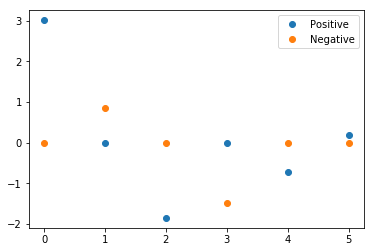

In [20]:
plt.plot(pos,'o',label='Positive')
plt.plot(neg,'o',label='Negative')
plt.legend()
plt.show()

In [21]:
# print(mu_vals)
print(np.where(pos-17.73195821*np.ones_like(pos)>1e-5))
# print(neg)

(array([], dtype=int64),)
